In [34]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [35]:
# Load DataFrame and filter records for 2010 onwards for Brazil, Vietnam, United States, Tanzania and Papua New Guinea
df = pd.read_csv(f'psd_coffee.csv')
df_filtered = df[df['Country'].isin(['Brazil', 'Vietnam', 'United States', 'Tanzania', 'Switzerland']) & (df['Year'] >= 2002)]
df_filtered.head()

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
618,Brazil,2002,41600,26620,0,7235,13500,17939,29396,0,...,53600,66,0,12000,12700,800,2710,0,60835,60835
619,Brazil,2003,23600,21840,0,17939,14400,11819,24920,0,...,33200,50,0,9600,13600,800,3030,0,51139,51139
620,Brazil,2004,34300,24505,0,11819,15500,11999,27920,0,...,43600,45,0,9300,14700,800,3370,0,55419,55419
621,Brazil,2005,26000,21264,0,11999,15915,7641,24543,0,...,36100,86,0,10100,15000,915,3193,0,48099,48099
622,Brazil,2006,36000,26185,0,7641,16720,8361,29260,0,...,46700,55,0,10700,15750,970,3020,0,54341,54341


In [36]:
# Split into training and test data. Training data is for the first 10 years, while test data is the final 3 years in the series
df_train = df_filtered[(df_filtered['Year'] >= 2002) & (df_filtered['Year'] < 2020)]
df_test = df_filtered[df_filtered['Year'] >= 2020]
X_train = df_train.drop(['Other Production', 'Total Distribution', 'Exports'], axis=1)
y_train = df_train['Exports']
X_test = df_test.drop(['Other Production', 'Total Distribution', 'Exports'], axis=1)
y_test = df_test['Exports']

In [37]:
X_train.columns

Index(['Country', 'Year', 'Arabica Production', 'Bean Exports', 'Bean Imports',
       'Beginning Stocks', 'Domestic Consumption', 'Ending Stocks', 'Imports',
       'Production', 'Roast & Ground Exports', 'Roast & Ground Imports',
       'Robusta Production', 'Rst,Ground Dom. Consum', 'Soluble Dom. Cons.',
       'Soluble Exports', 'Soluble Imports', 'Total Supply'],
      dtype='object')

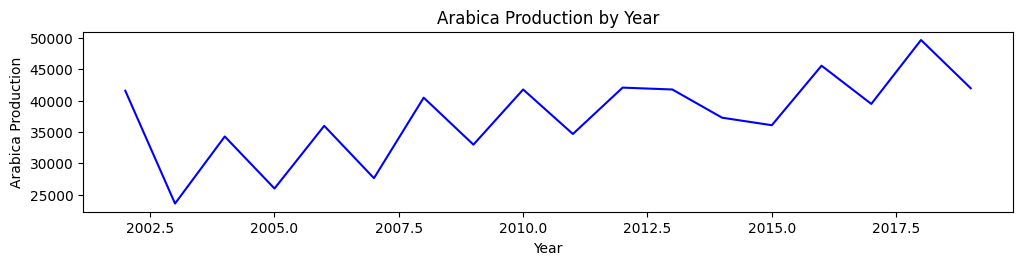

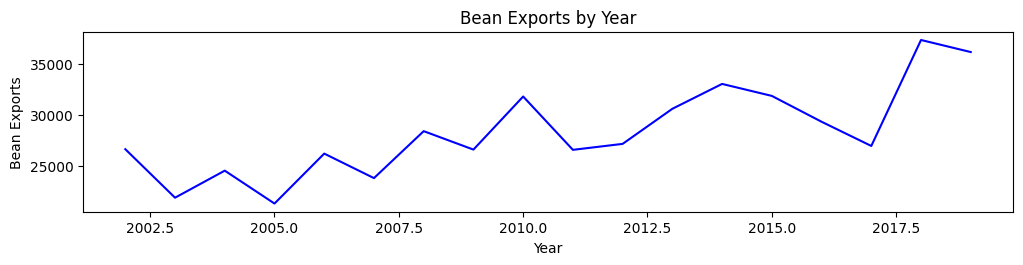

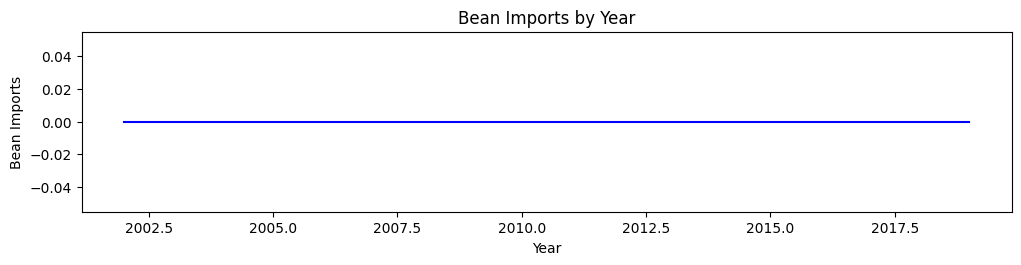

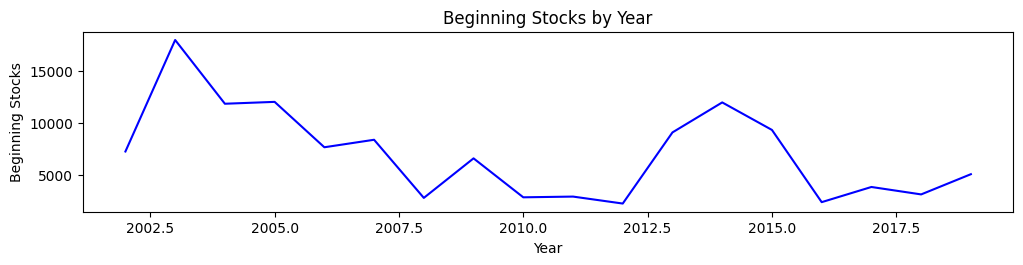

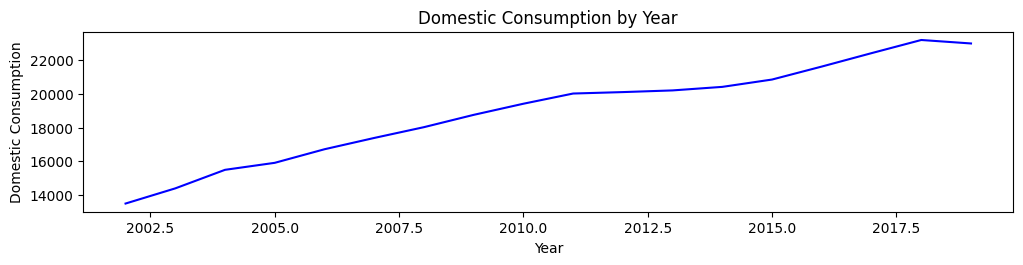

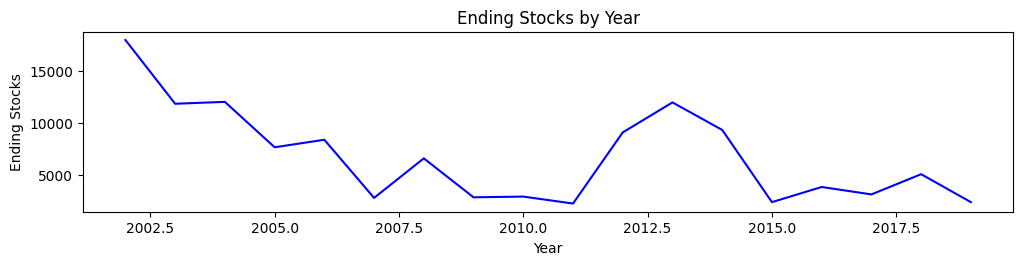

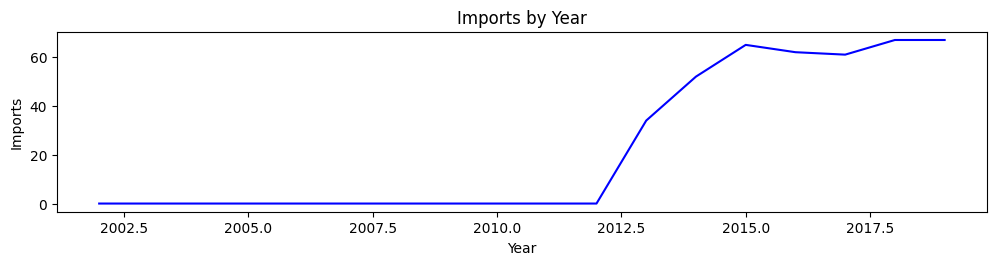

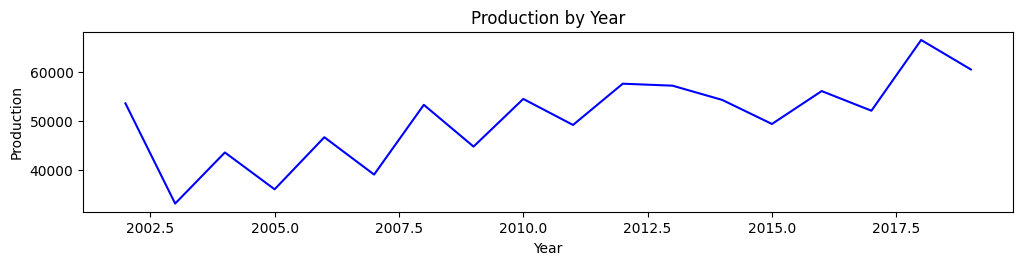

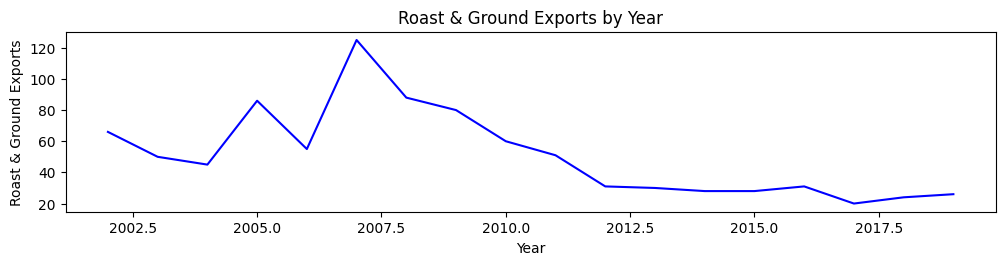

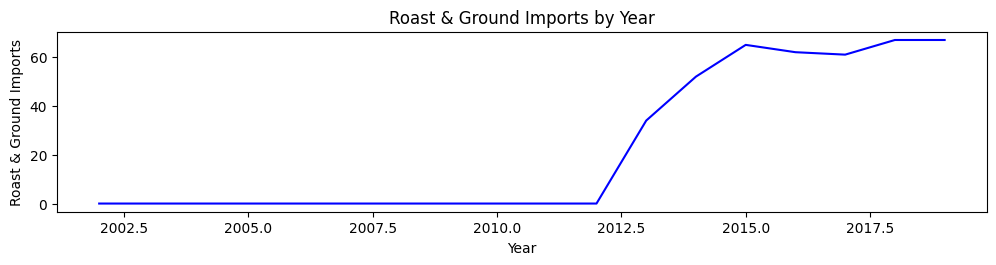

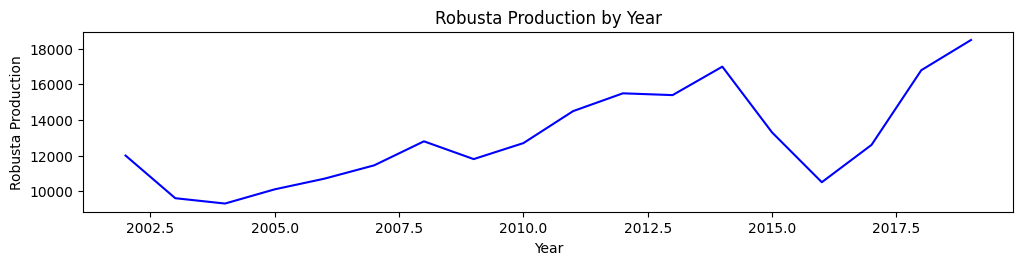

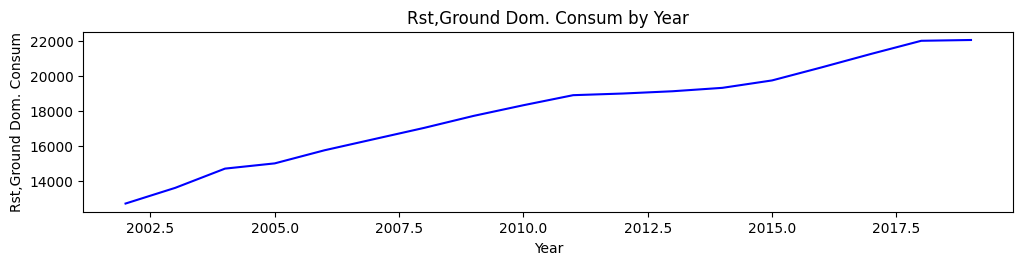

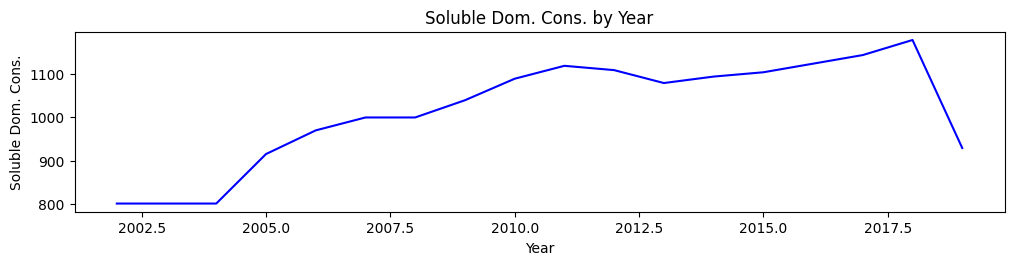

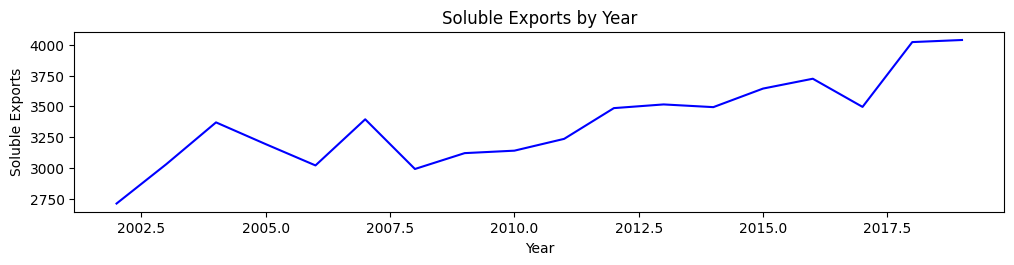

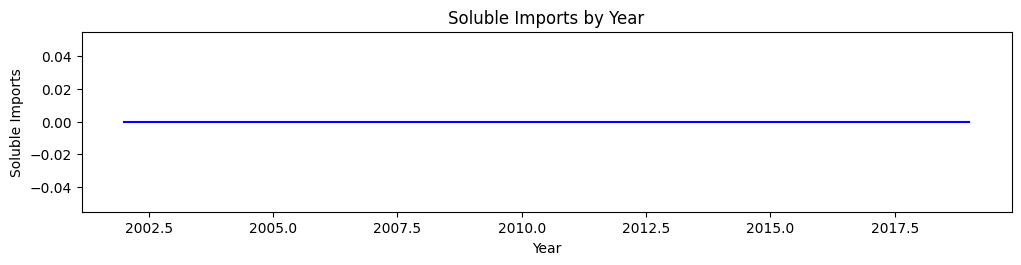

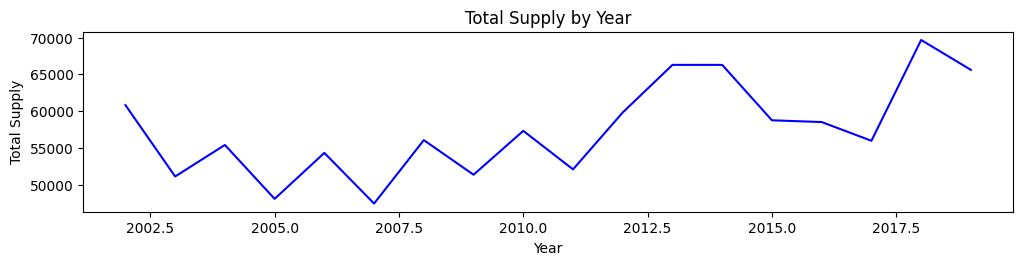

In [38]:
# Plot distribution of input variables for Brazil
def plot_country_input_distribution(country:str, color:str):
    X_train_country = X_train[X_train['Country'] == country]
    for i in range(len(X_train_country.columns[2:])):
        plt.figure(figsize=(12,50))
        ax = plt.subplot(len(X_train_country.columns), 1, i + 1)
        sns.lineplot(x=X_train_country['Year'], y=X_train_country.iloc[:, 2 + i], color=color)
        plt.title(f'{X_train.columns[2 + i]} by Year')
        plt.xlabel('Year')
        plt.ylabel(f'{X_train.columns[2+i]}')
        plt.show()
plot_country_input_distribution(country='Brazil', color='Blue')

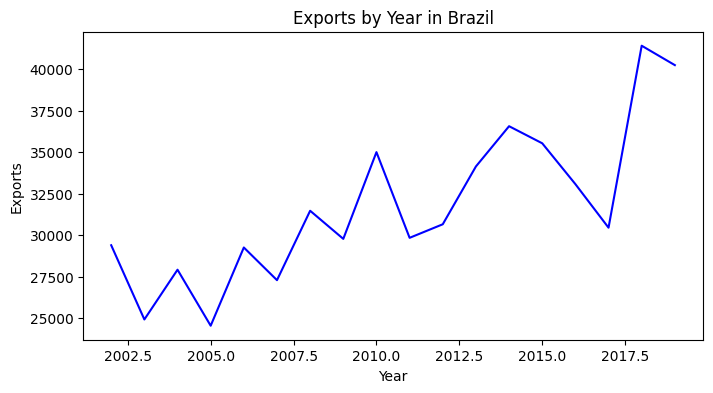

In [39]:
# Plot Distribution of exports
def plot_distribution_of_exports(country:str, color:str):
    plt.figure(figsize=(8,4))
    sns.lineplot(x='Year', y='Exports', data=df_train[df_train['Country'] == country], color=color)
    plt.xlabel('Year')
    plt.ylabel('Exports')
    plt.title(f'Exports by Year in {country}')
    plt.show()
plot_distribution_of_exports(country='Brazil', color='Blue')

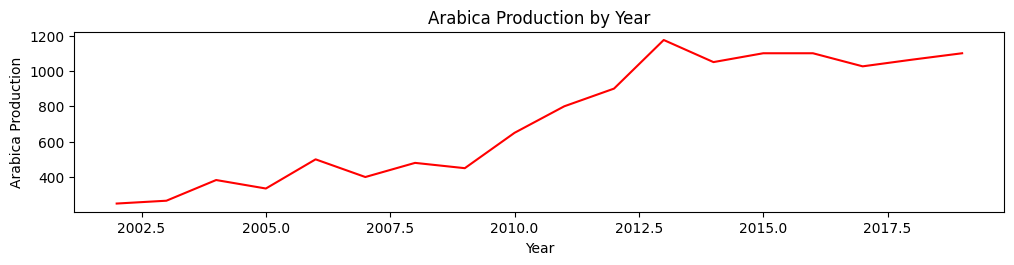

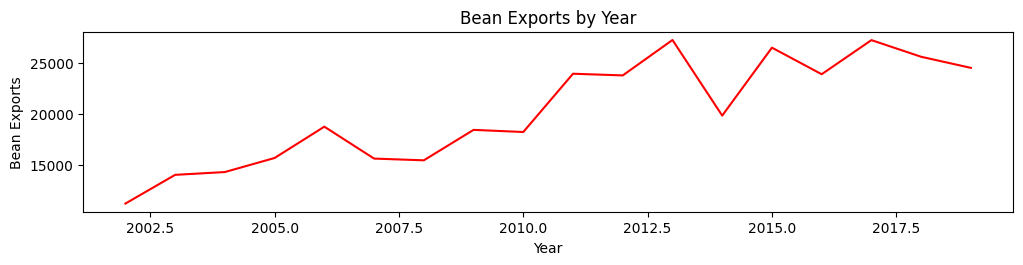

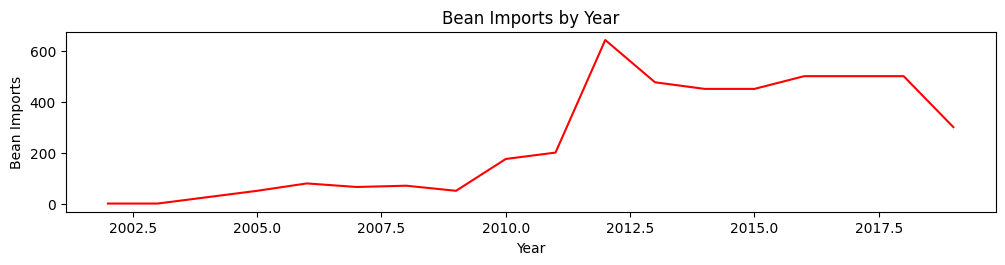

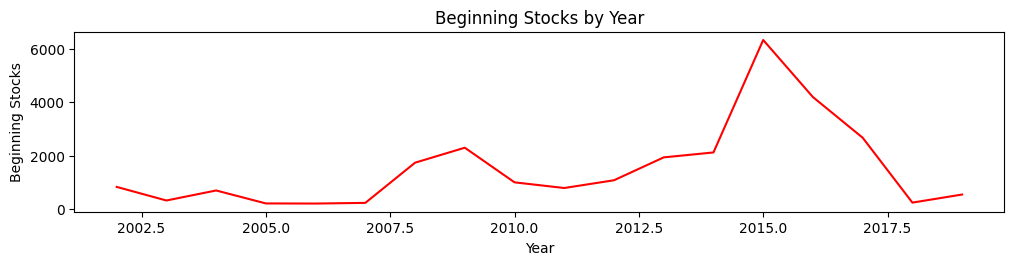

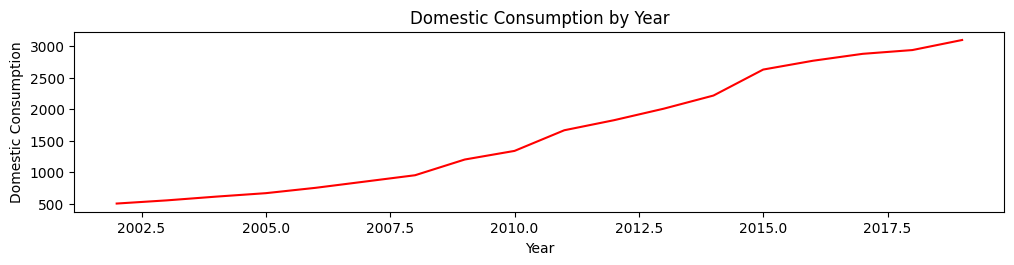

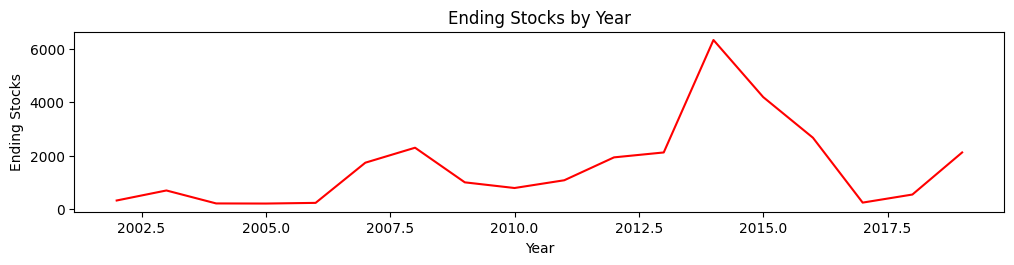

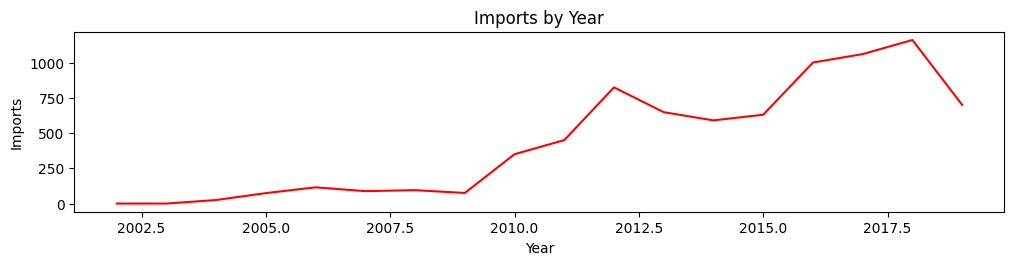

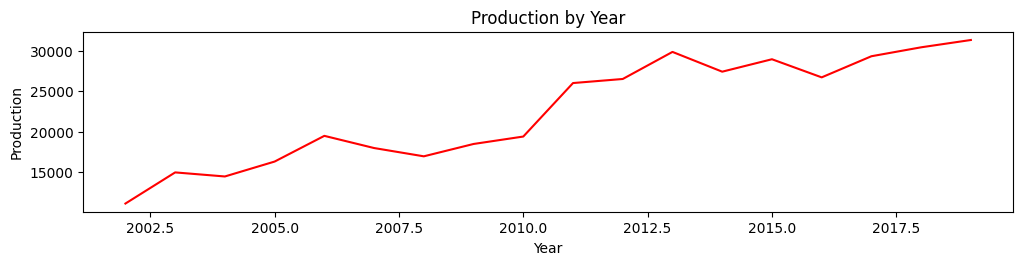

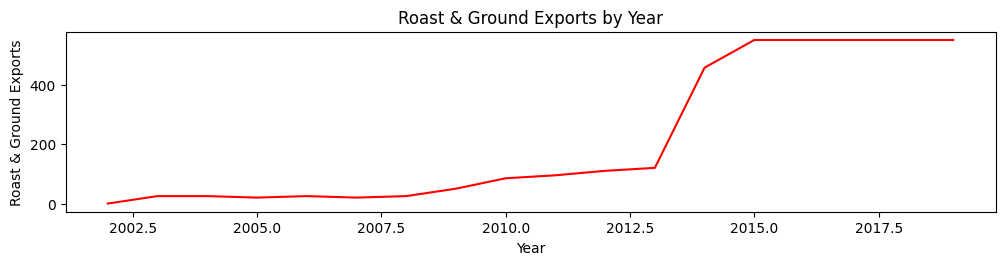

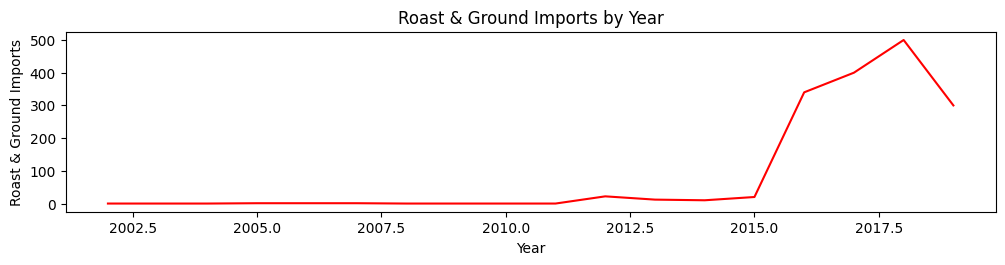

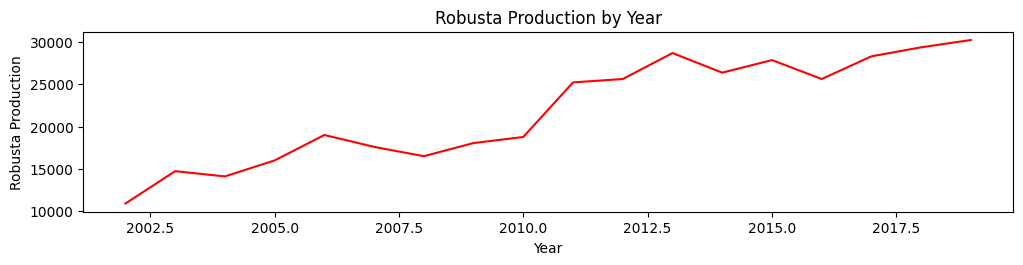

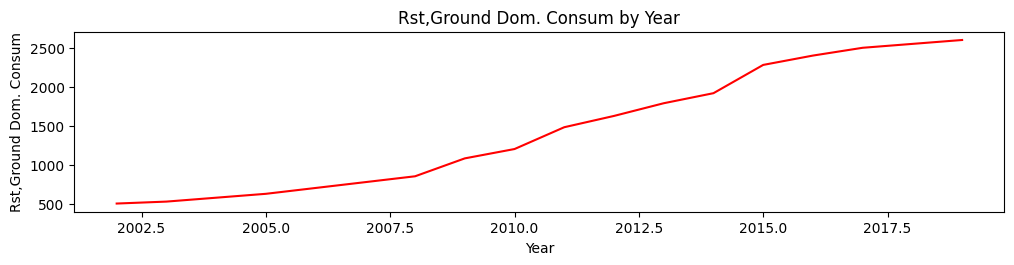

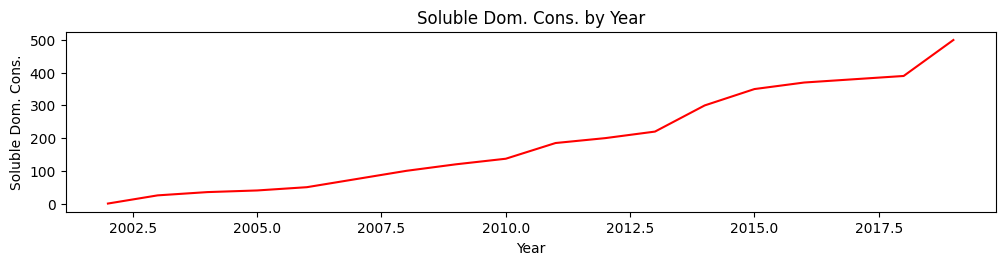

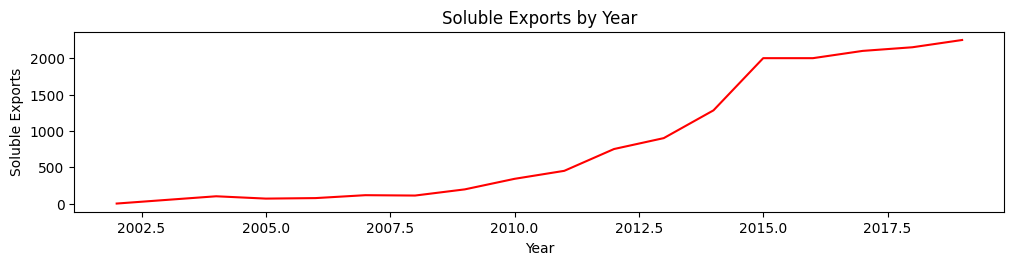

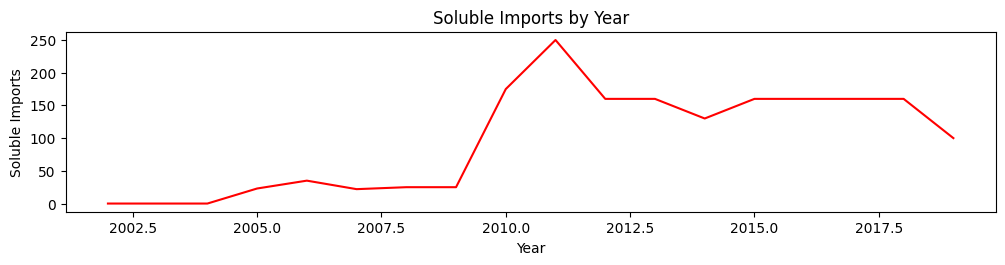

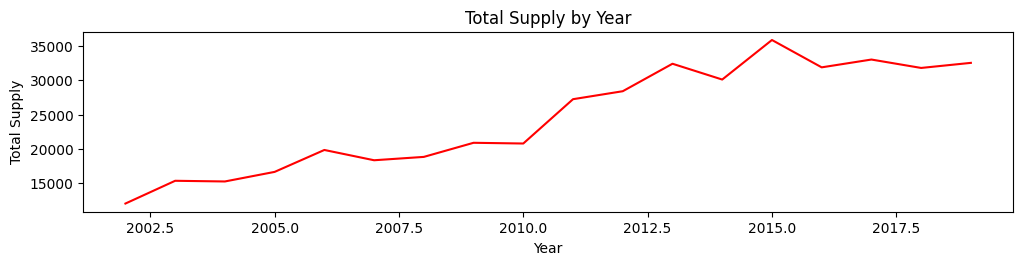

In [40]:
# Plot distribution of input variables for Vietnam
plot_country_input_distribution(country='Vietnam', color='Red')

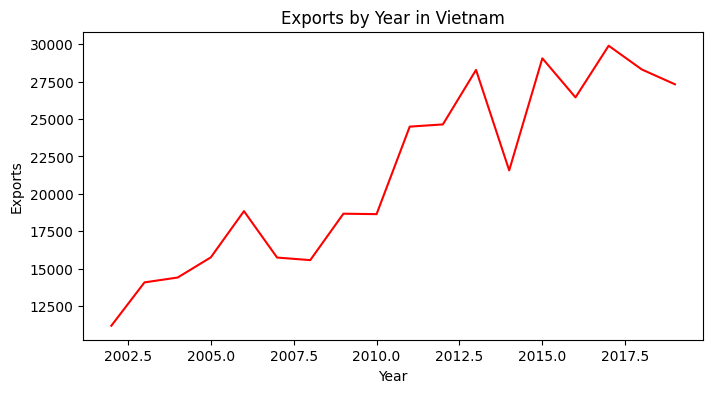

In [41]:
# Plot distribution of exports for Vietnam
plot_distribution_of_exports(country='Vietnam', color='Red')

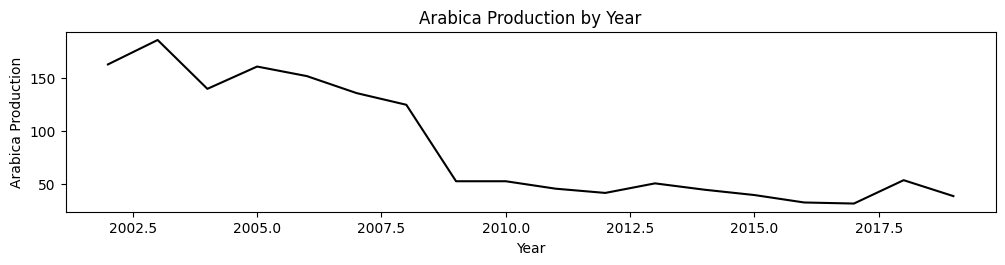

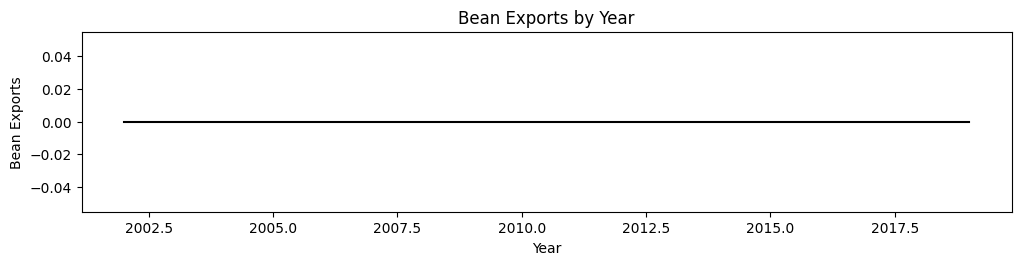

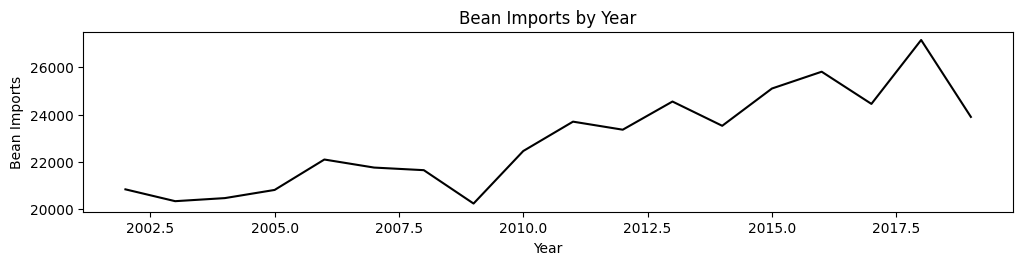

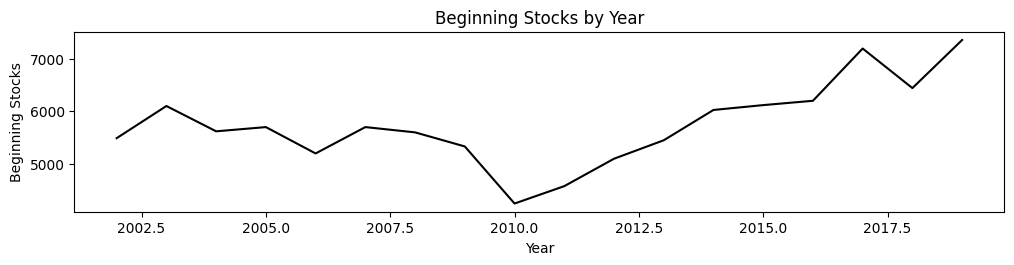

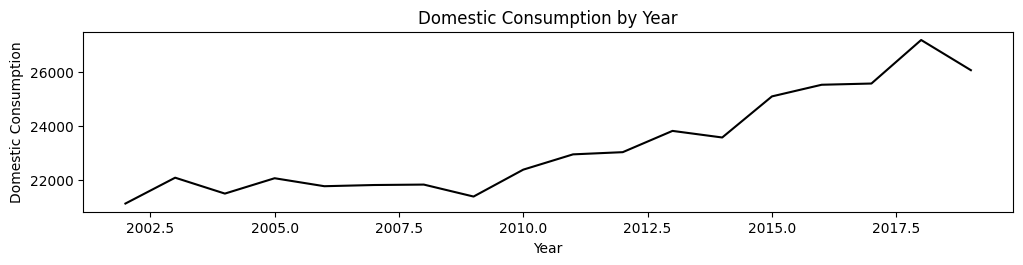

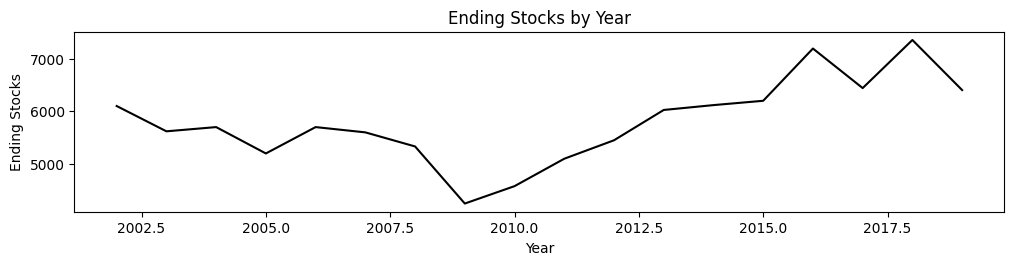

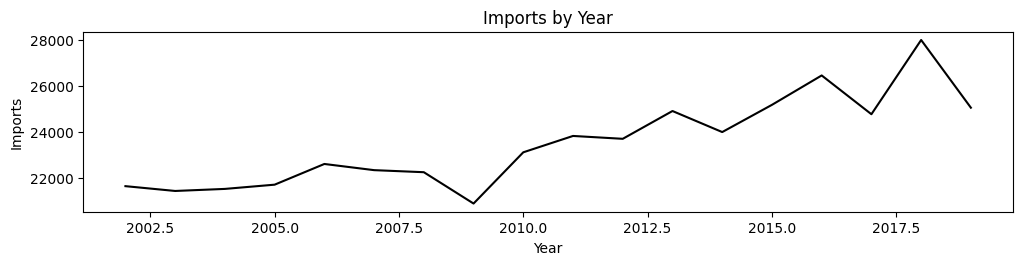

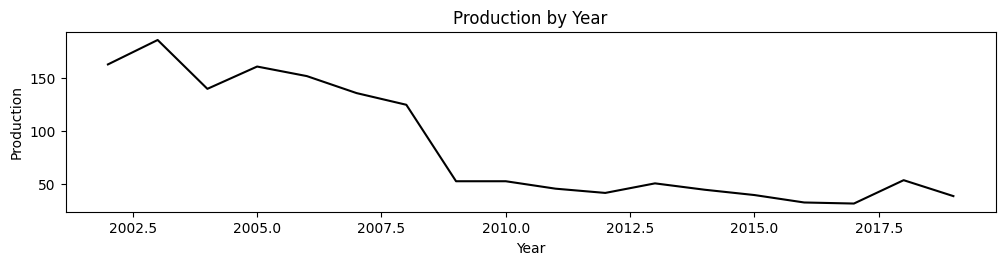

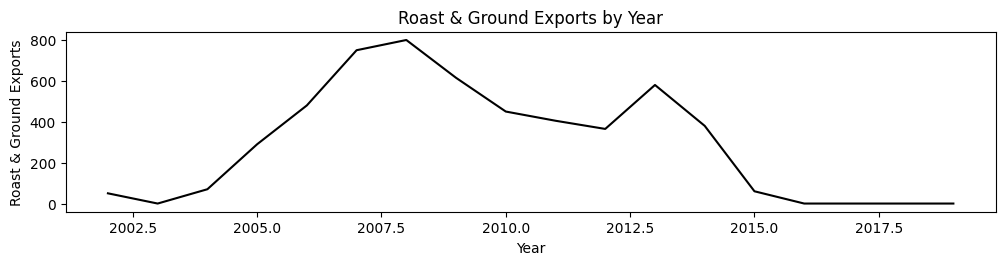

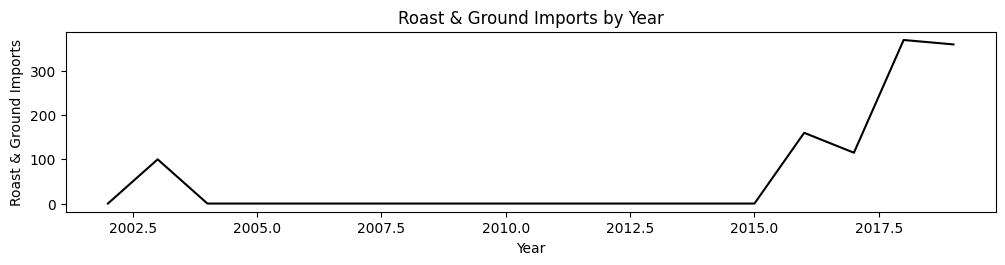

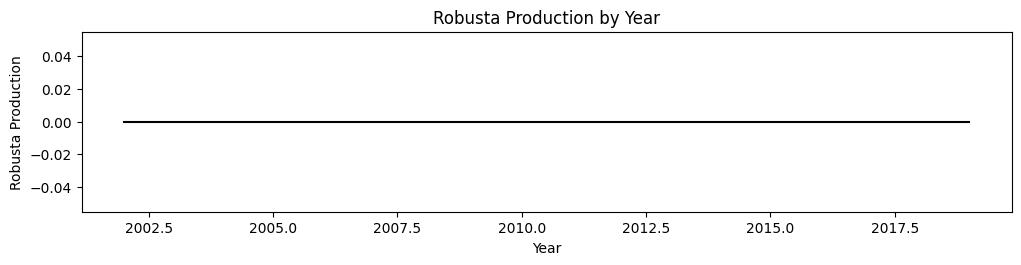

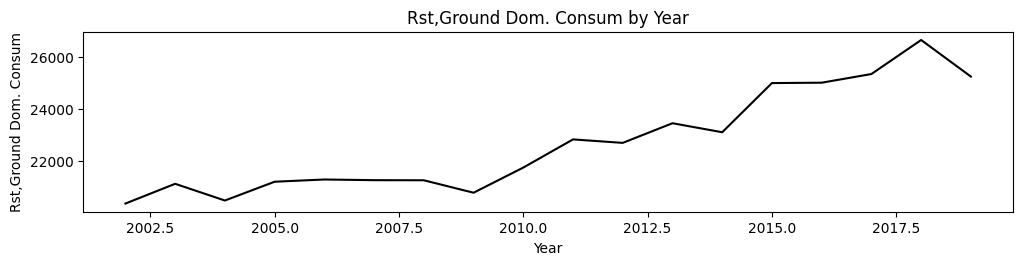

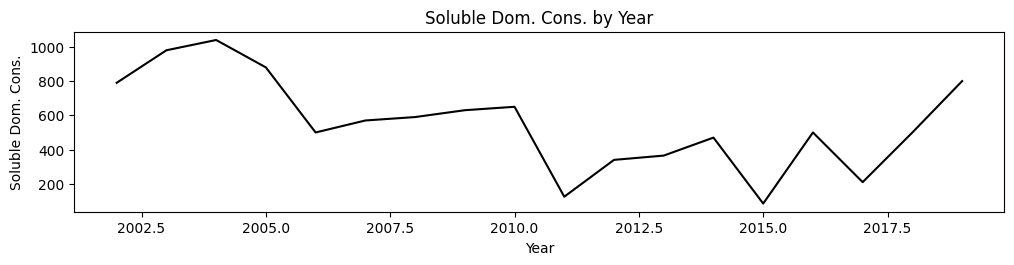

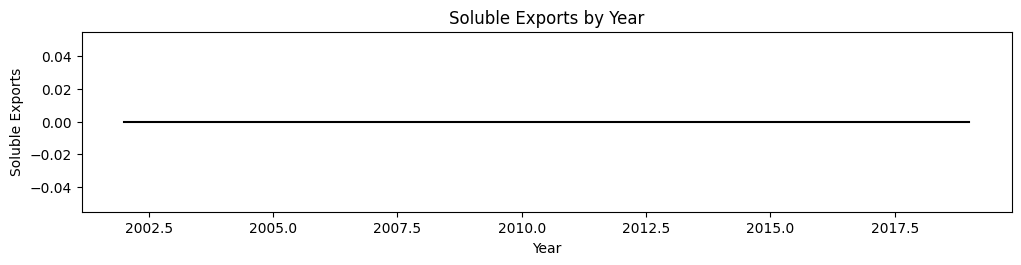

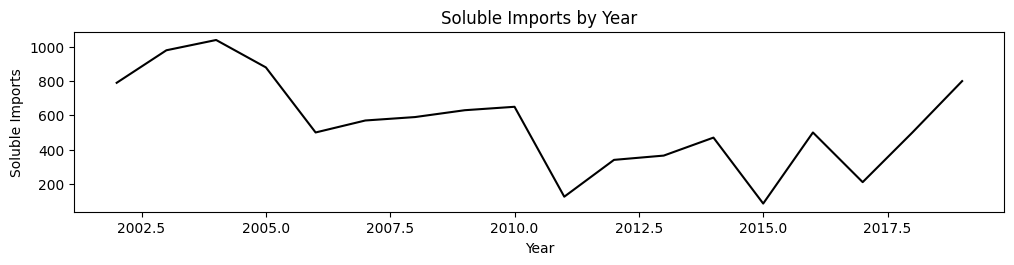

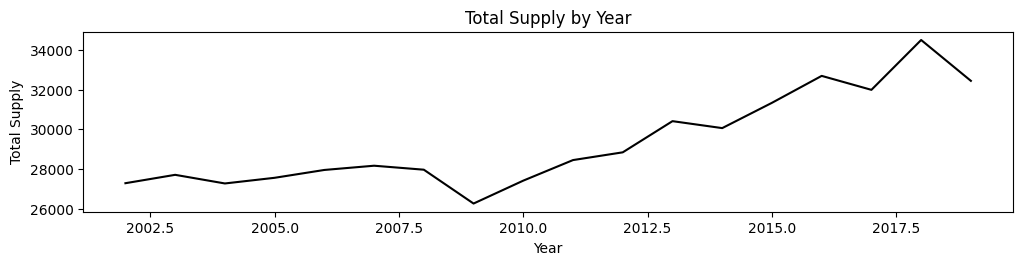

In [42]:
# Plot distribution of input variables for United States
plot_country_input_distribution(country='United States', color='Black')

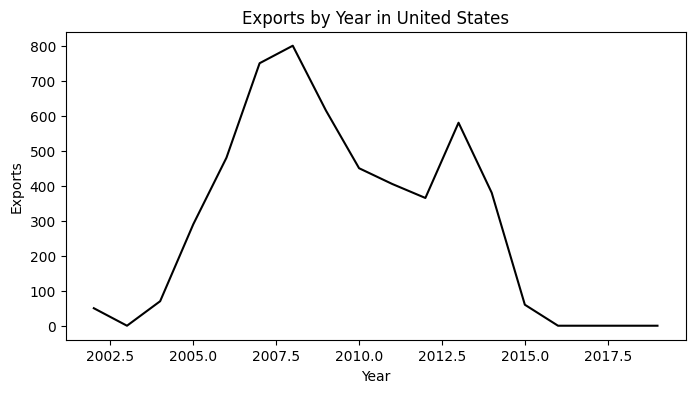

In [43]:
# Plot distribution of exports for United States
plot_distribution_of_exports(country='United States', color='Black')

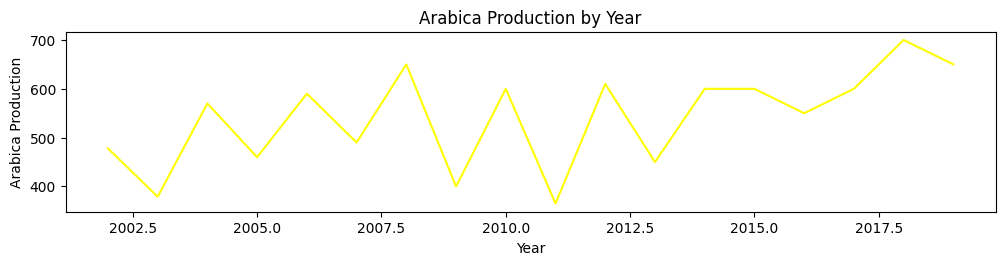

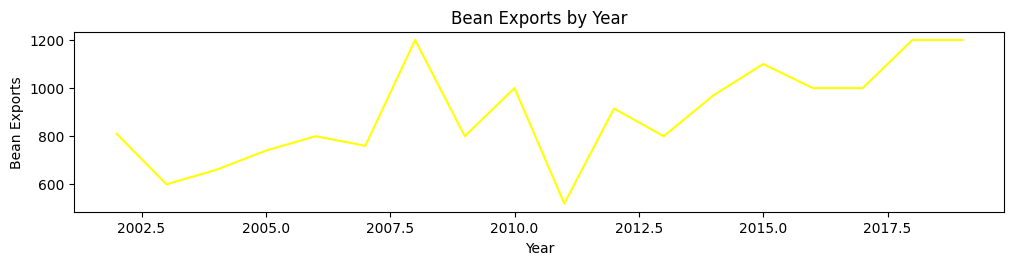

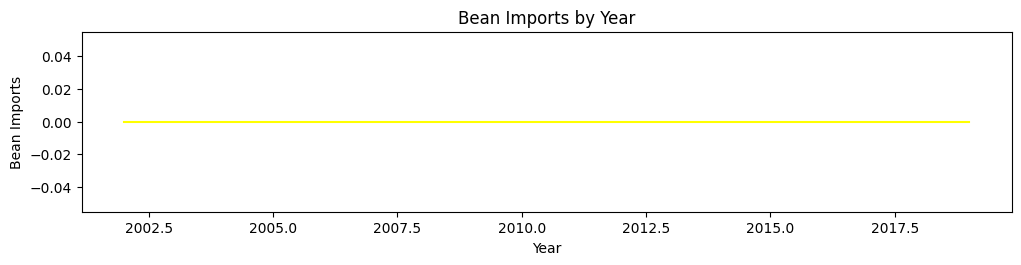

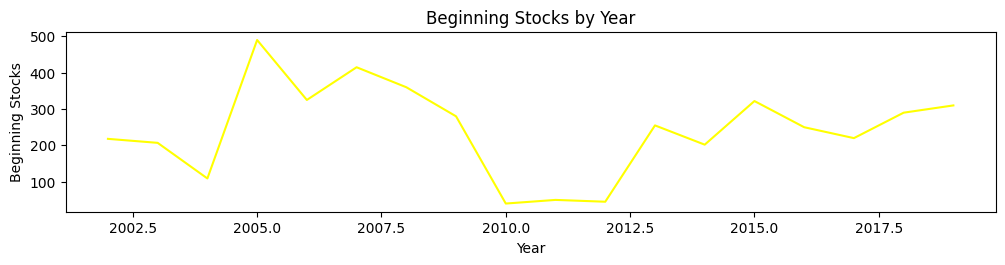

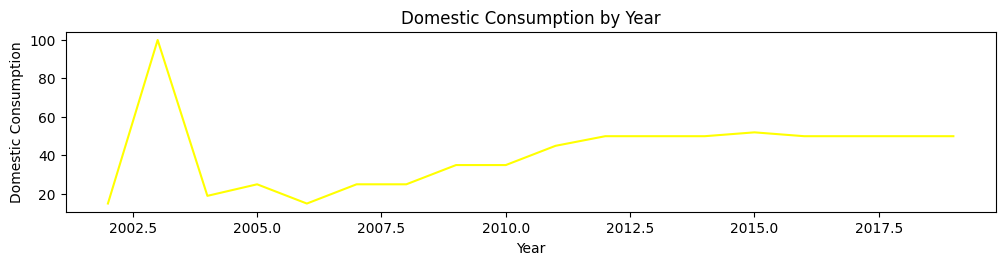

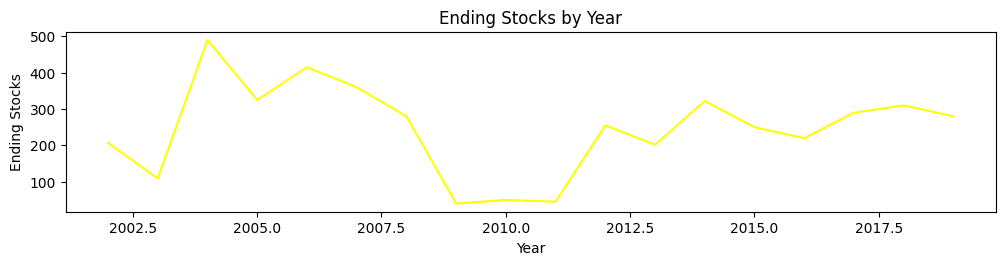

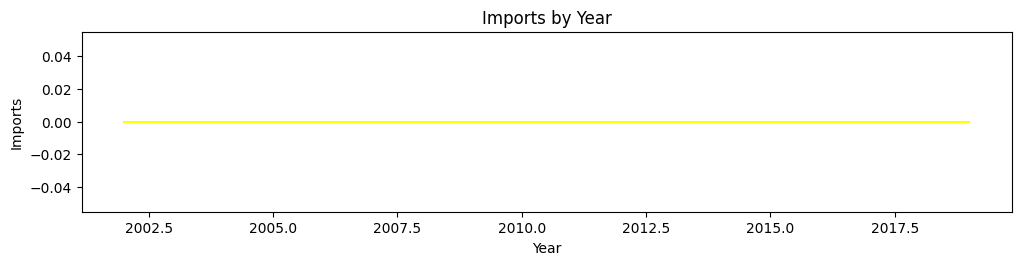

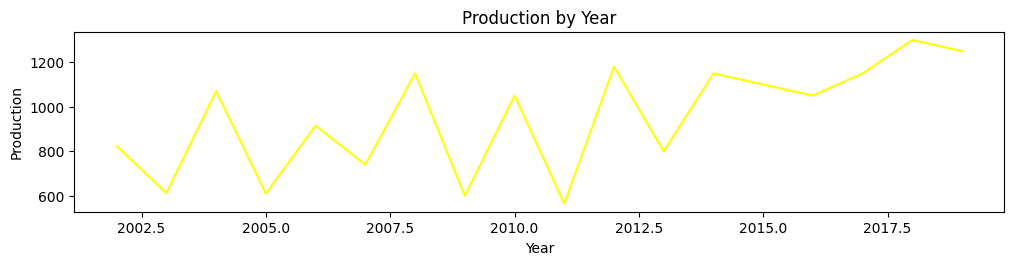

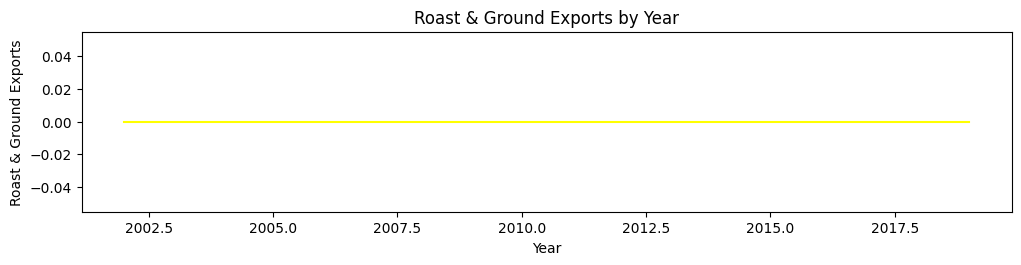

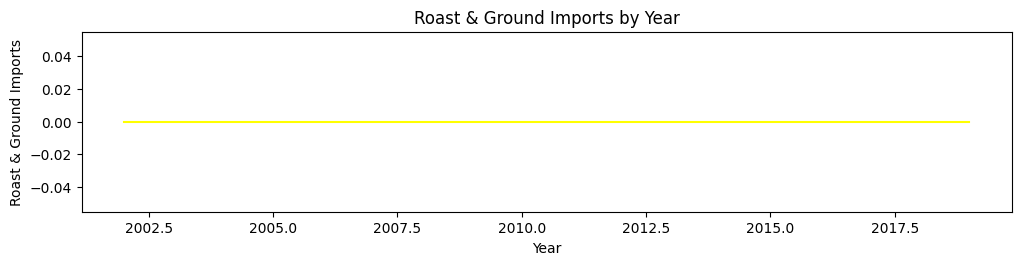

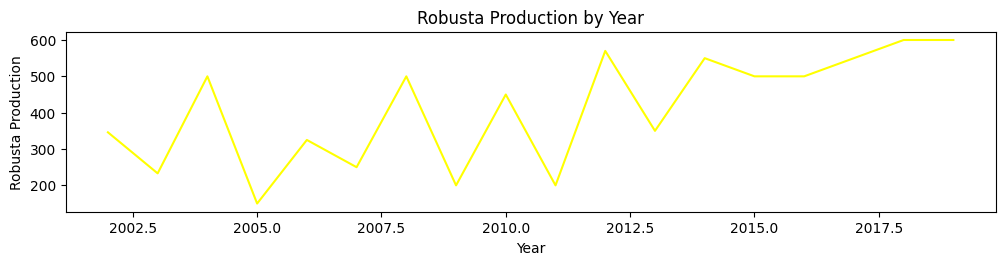

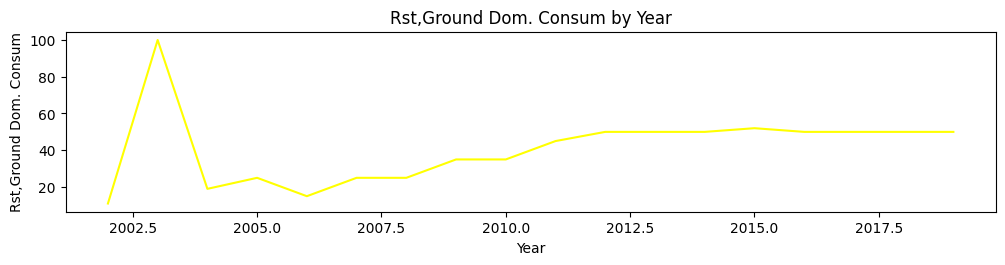

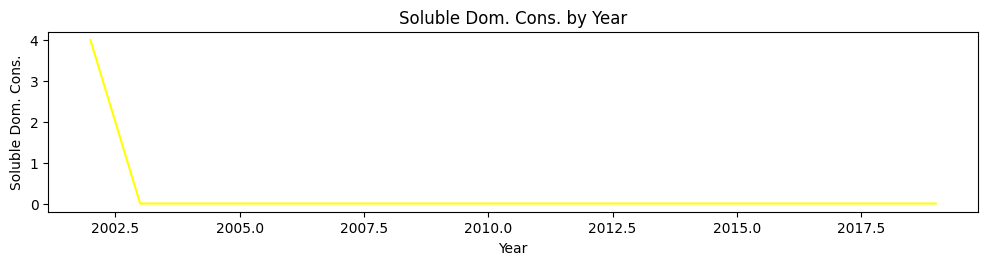

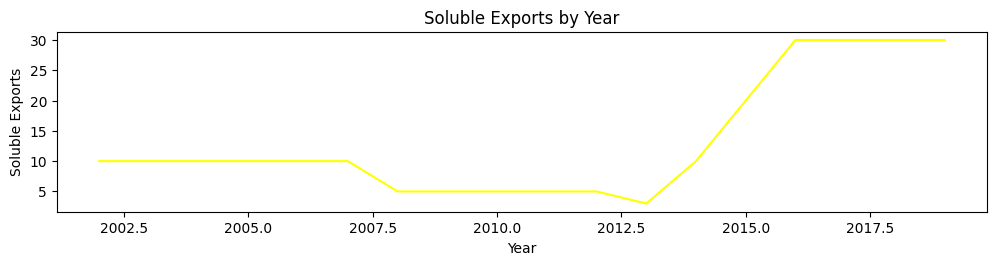

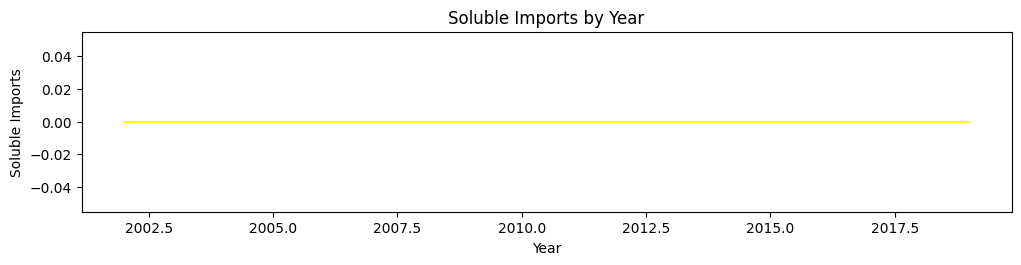

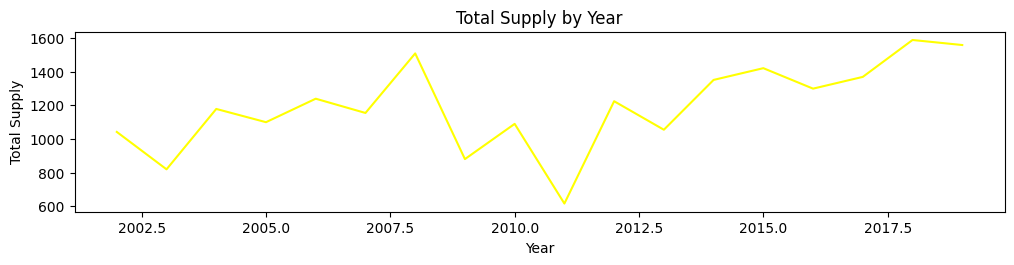

In [44]:
# Plot distribution of input variables for Tanzania
plot_country_input_distribution(country='Tanzania', color='Yellow')

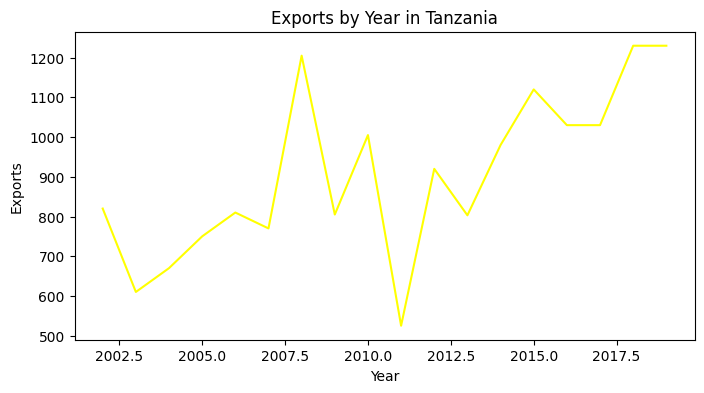

In [45]:
# Plot distribution of exports for Tanzania
plot_distribution_of_exports(country='Tanzania', color='Yellow')

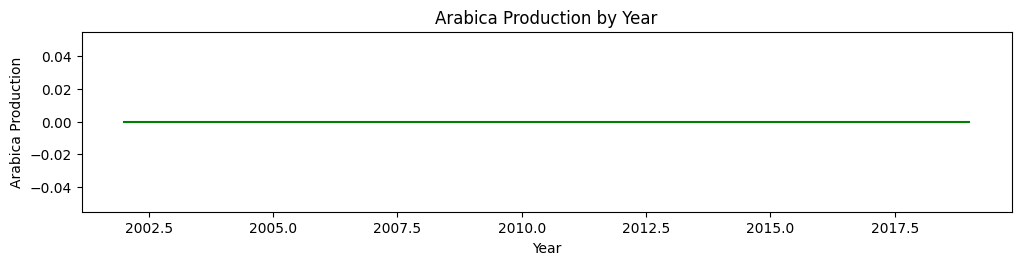

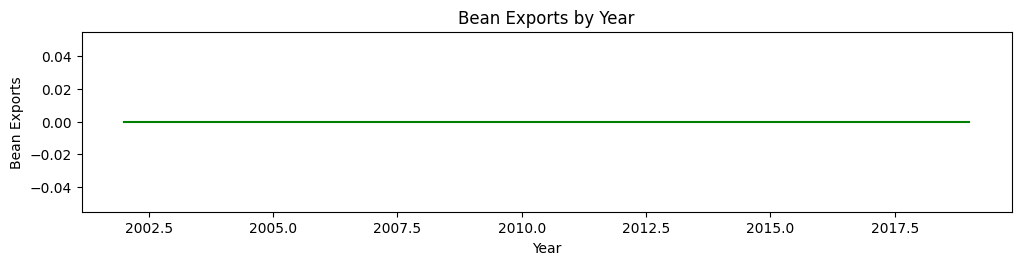

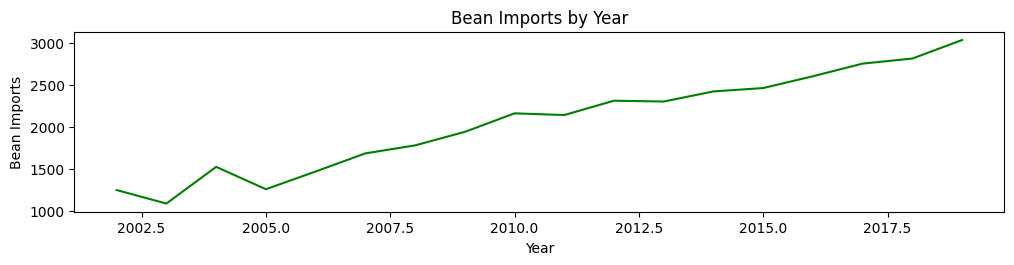

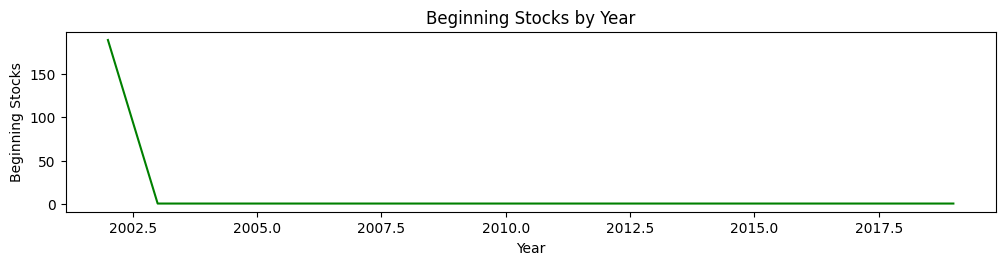

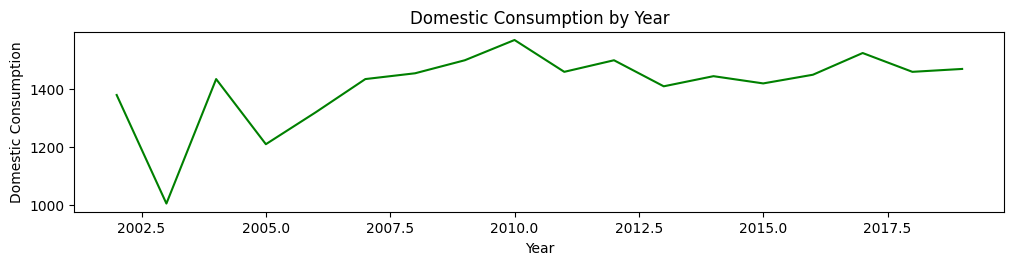

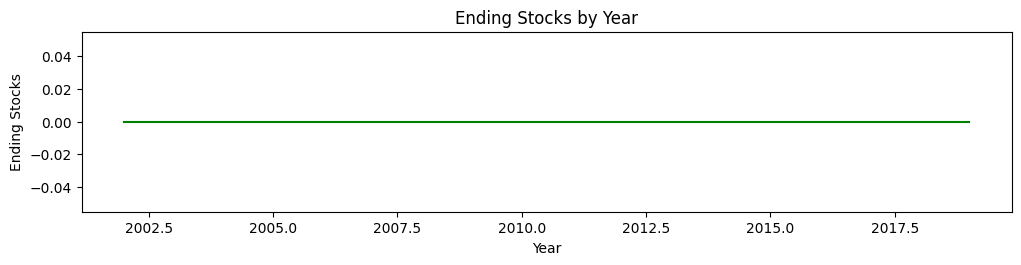

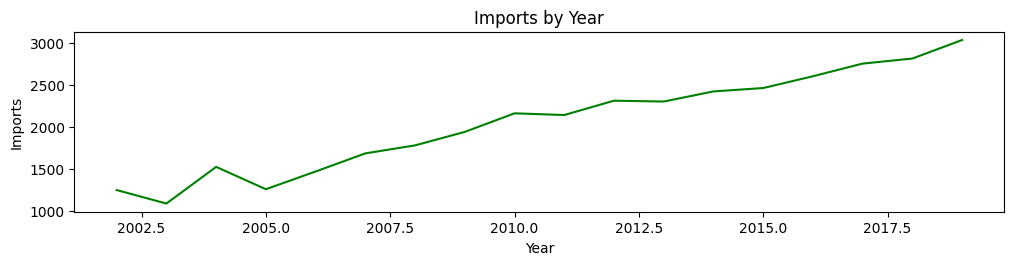

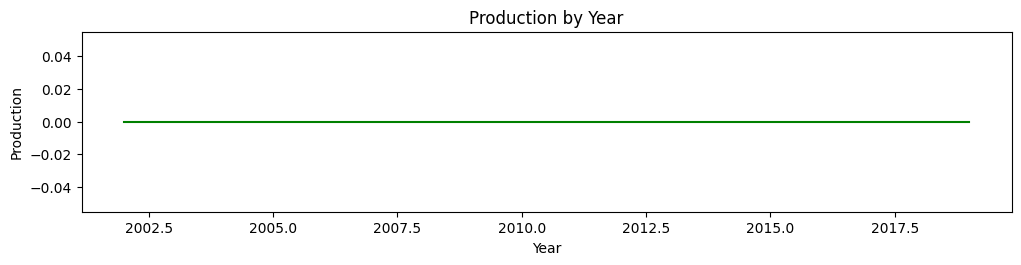

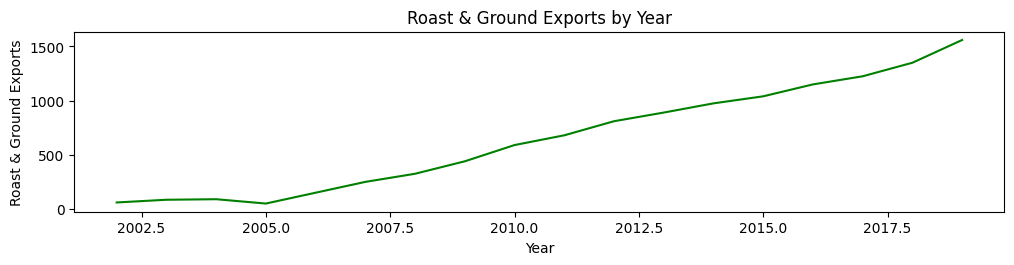

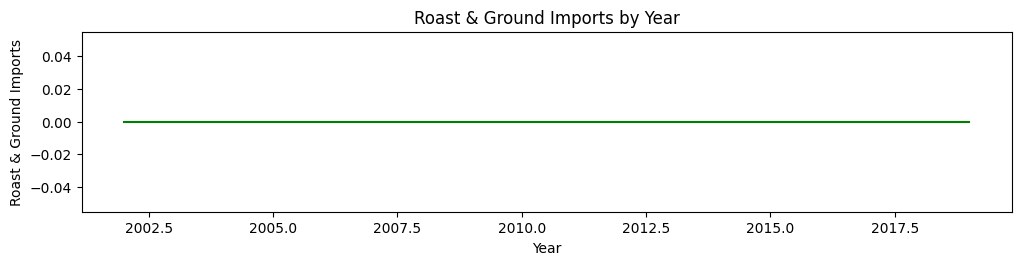

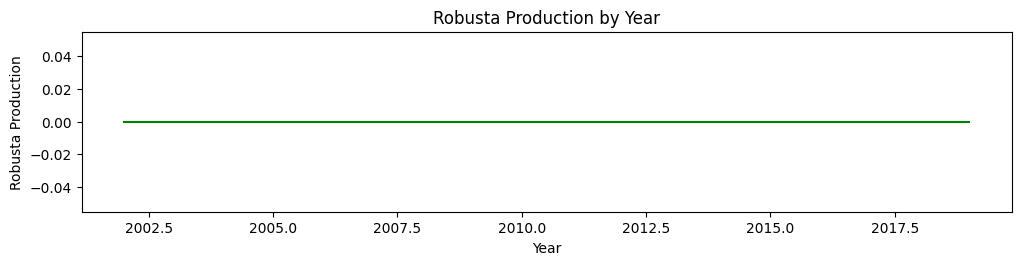

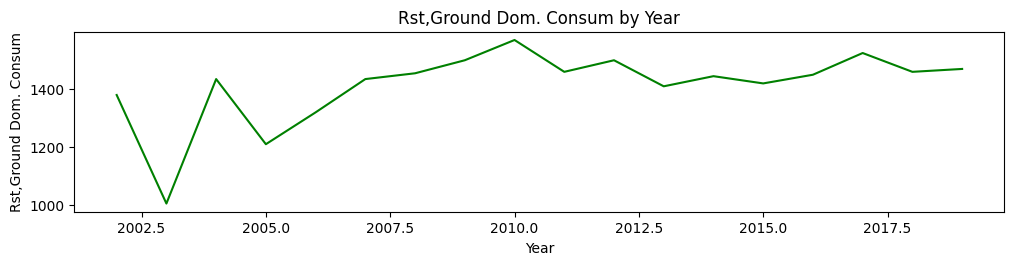

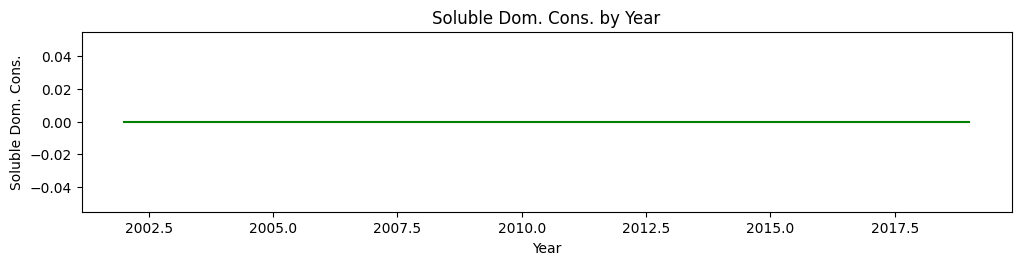

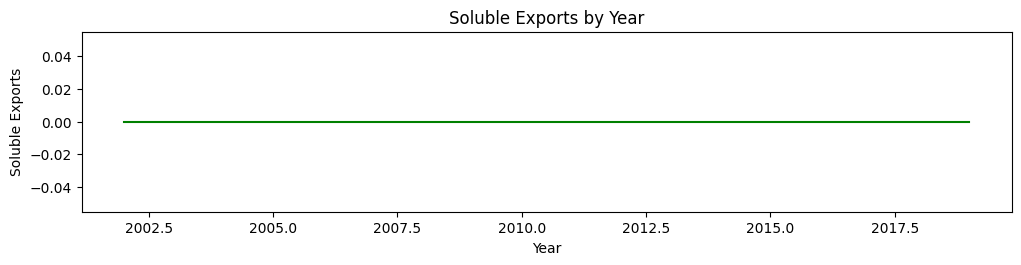

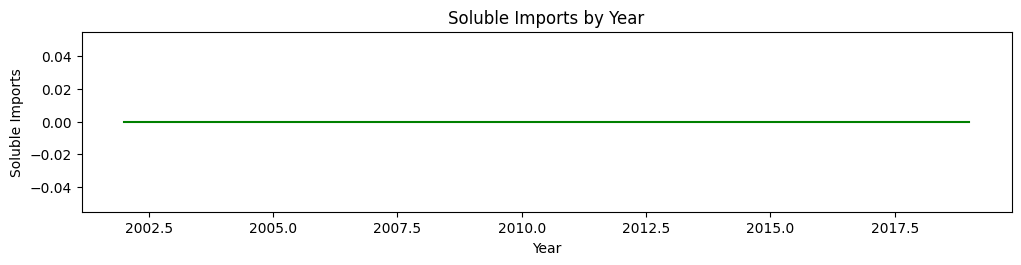

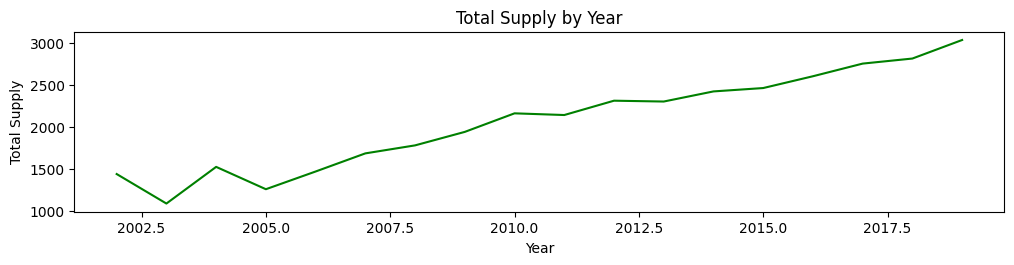

In [46]:
# Plot distribution of input variables for Switzerland
plot_country_input_distribution(country='Switzerland', color='Green')

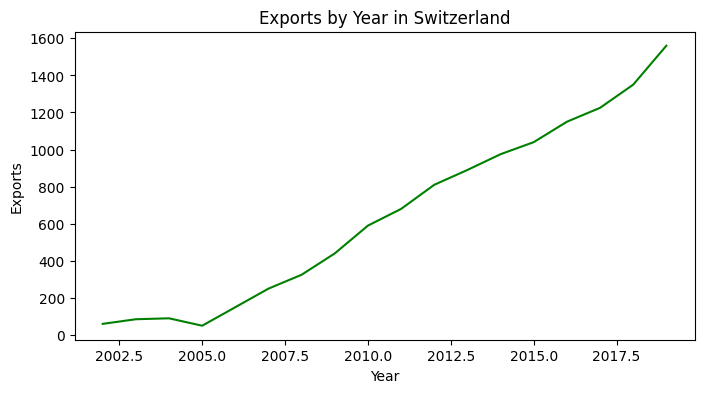

In [47]:
# Plot distribution of exports for Switzerland
plot_distribution_of_exports(country='Switzerland', color='Green')

<Figure size 800x400 with 0 Axes>

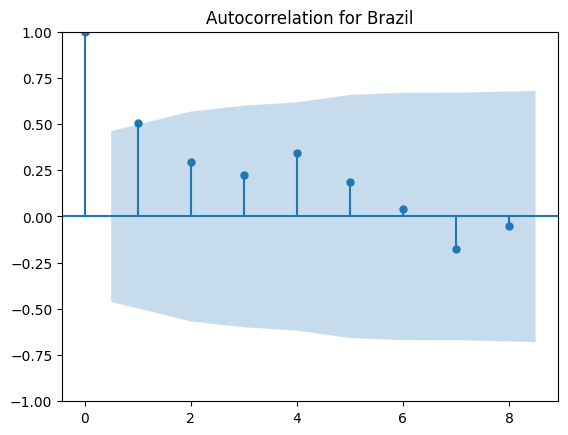

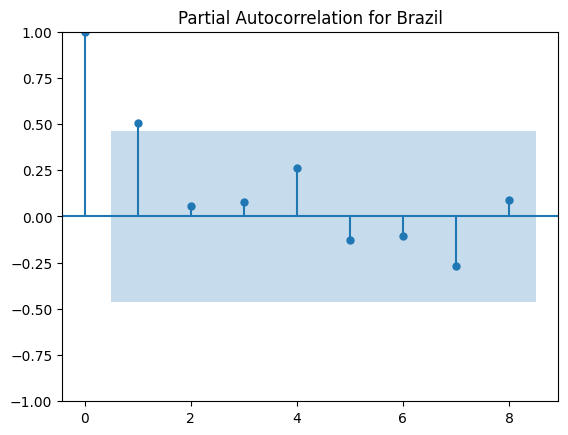

<Figure size 800x400 with 0 Axes>

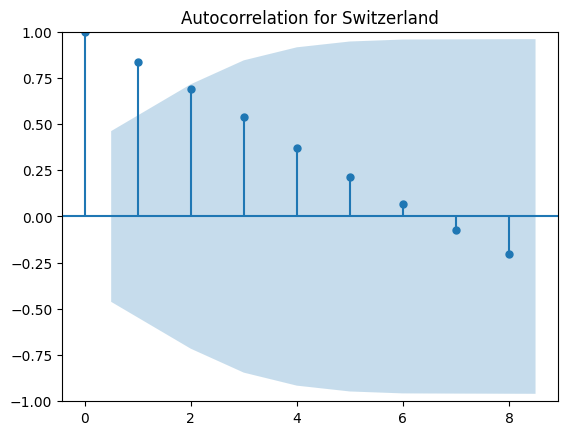

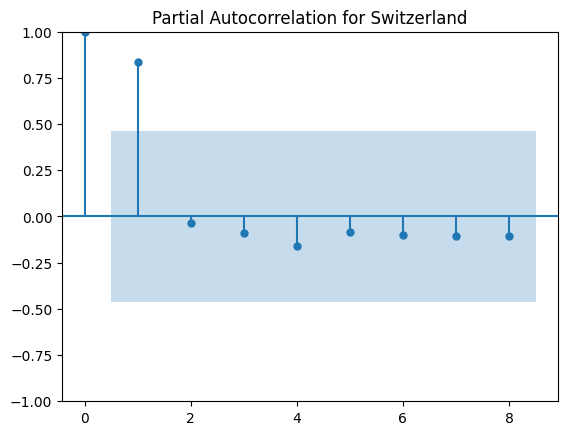

<Figure size 800x400 with 0 Axes>

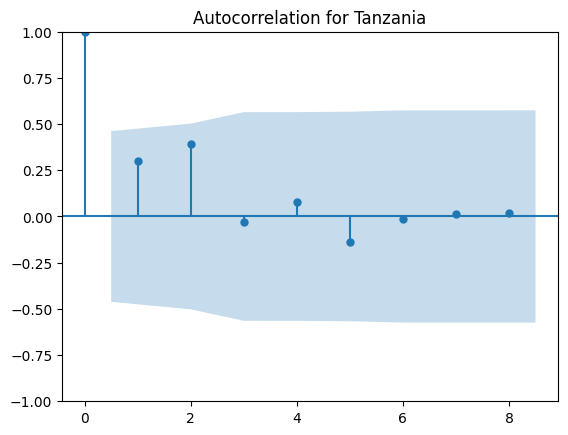

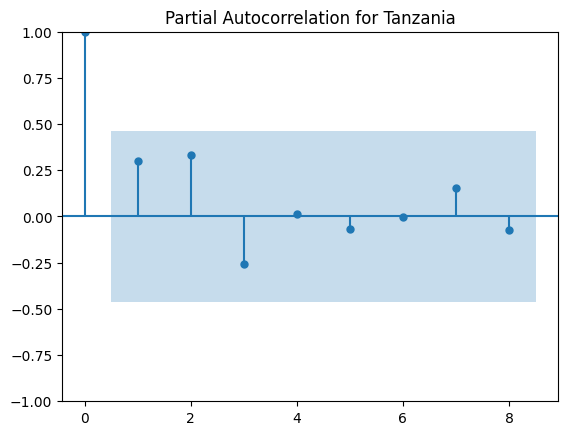

<Figure size 800x400 with 0 Axes>

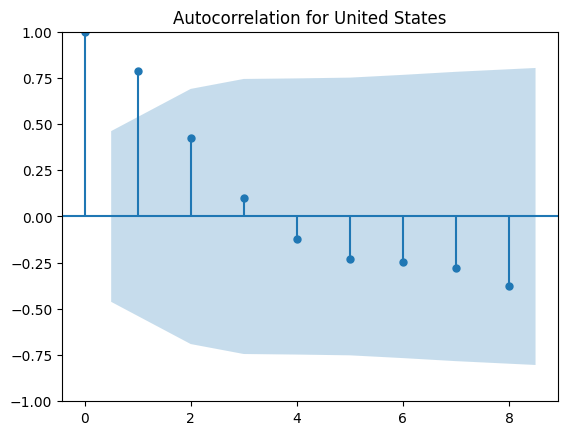

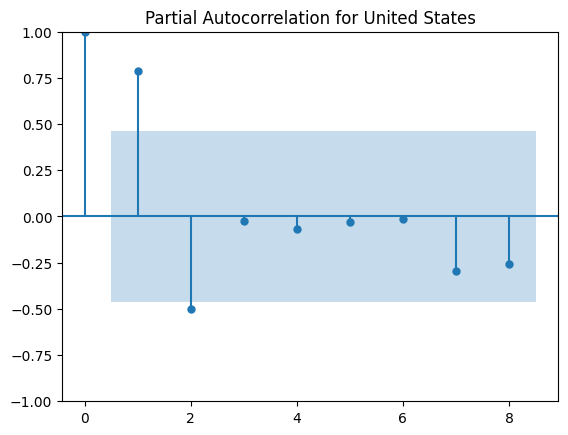

<Figure size 800x400 with 0 Axes>

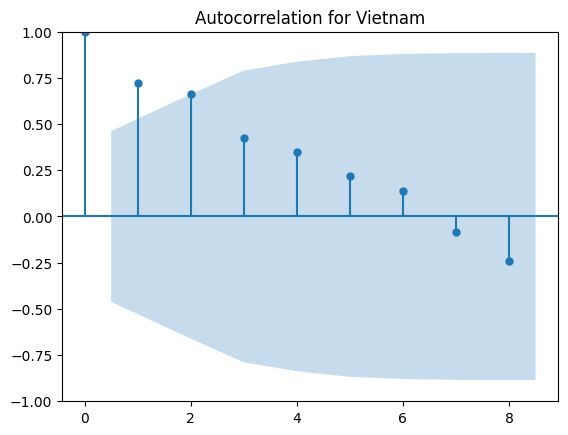

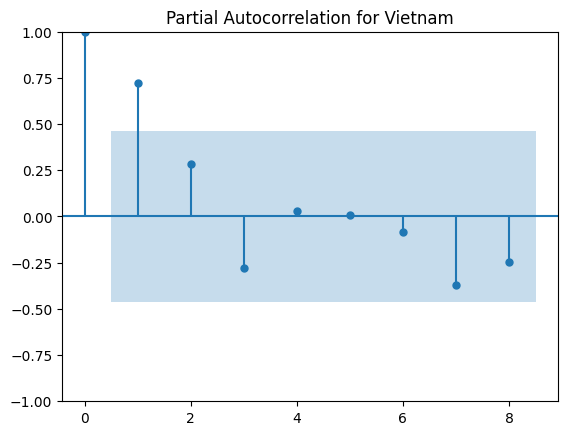

In [48]:
# Generate partial autocorrelation plots for exports in each country
countries = df_train['Country'].unique()
for country in countries:
    country_df = df_train[df_train['Country'] == country]
    country_df = country_df.set_index('Year')
    plt.figure(figsize=(8,4))
    plot_acf(country_df['Exports'], lags=8, title=f'Autocorrelation for {country}')
    plot_pacf(country_df['Exports'], lags=8, title=f'Partial Autocorrelation for {country}')
    plt.show()

/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_205760/1454591110.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `se

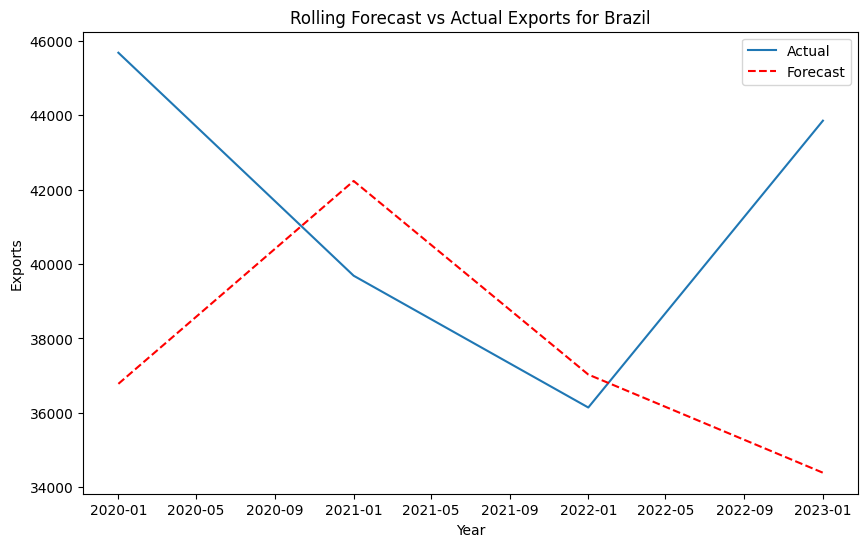

Mean Absolute Error (MAE) for Brazil : 5445.375043097954


/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary startin

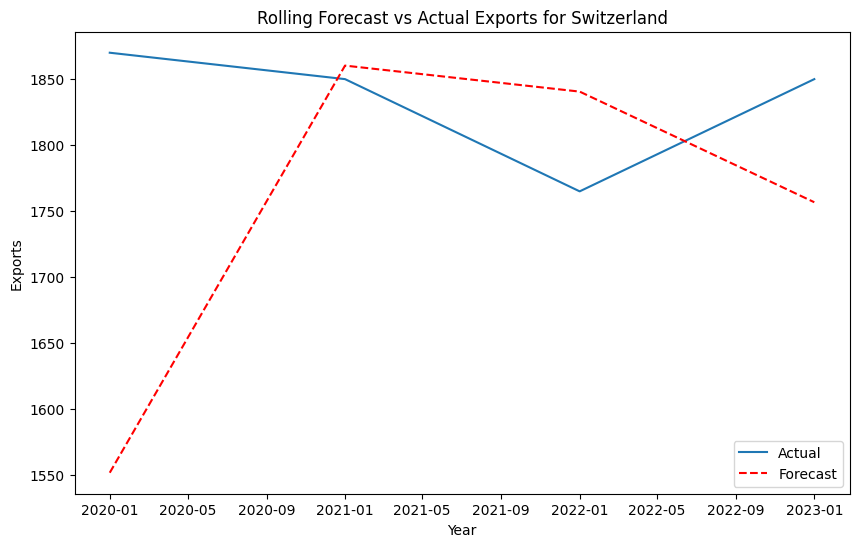

Mean Absolute Error (MAE) for Switzerland : 124.28383754841644


/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_205760/1454591110.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `se

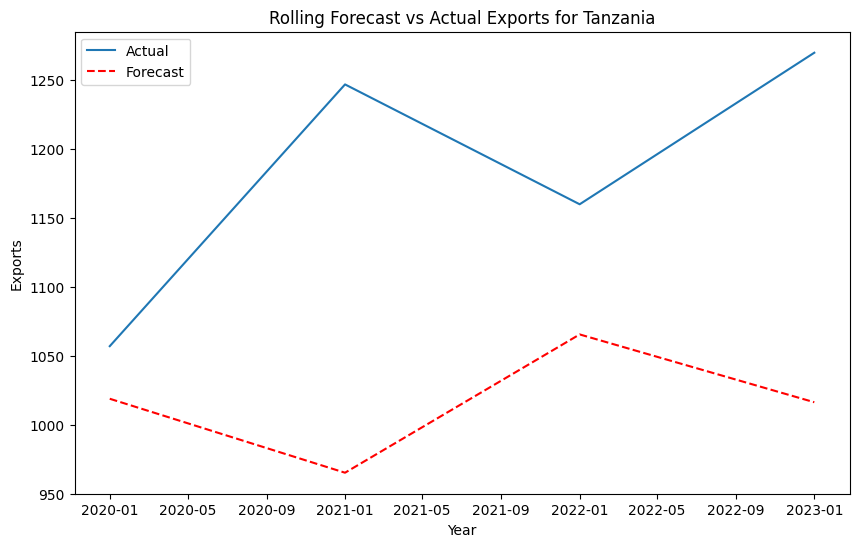

Mean Absolute Error (MAE) for Tanzania : 167.0421275551506


/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_205760/1454591110.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `se

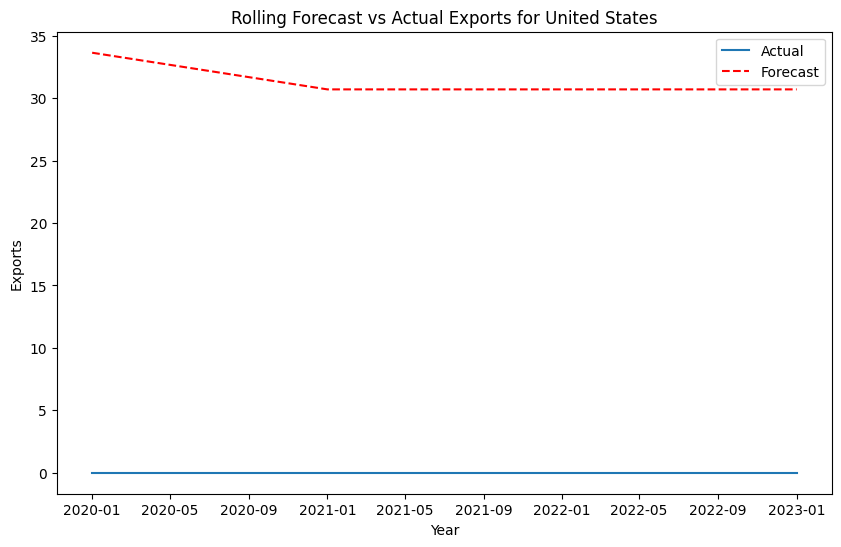

Mean Absolute Error (MAE) for United States : 31.435879774733706


/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_205760/1454591110.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `se

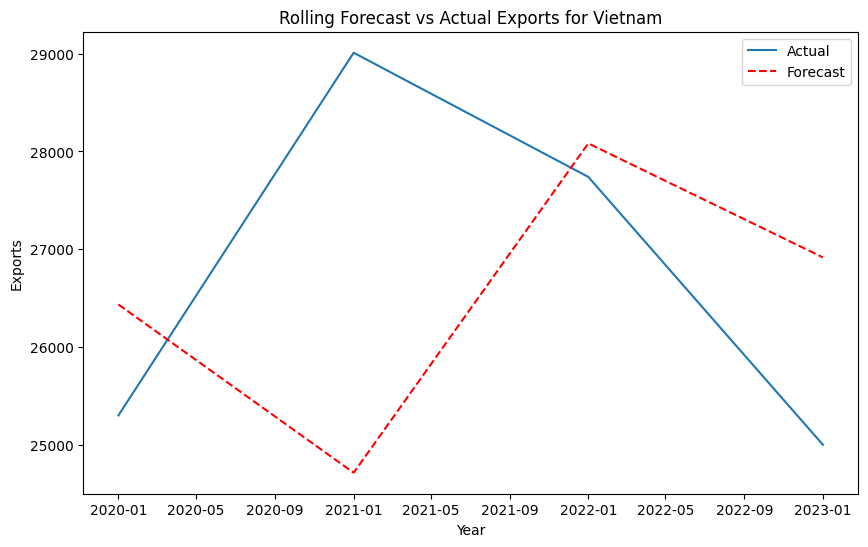

Mean Absolute Error (MAE) for Vietnam : 1922.5235618806782


In [49]:
# Fit a ARIMA model using one day lag as baseline prediction
for country in countries:
    X_baseline_train = df_train[df_train['Country'] == country][['Year', 'Exports']]
    X_baseline_train['Year'] = pd.to_datetime(X_baseline_train['Year'], format='%Y')
    X_baseline_train.set_index('Year', inplace=True)
    X_baseline_test = df_test[df_test['Country'] == country][['Year', 'Exports']]
    X_baseline_test['Year'] = pd.to_datetime(X_baseline_test['Year'], format='%Y')
    X_baseline_test.set_index('Year', inplace=True)
    forecasts = []
    actuals = []
    # Initialize the model
    model = ARIMA(X_baseline_train, order=(1,0,0))
    # Iterate over each step in the test set
    for i in range(len(X_baseline_test)):
        # Fit the model with data up to the current step
        model_fit = model.fit()
        
        # Forecast one step ahead
        forecast = model_fit.forecast(steps=1)[0]
        
        # Append the forecast to the list of forecasts
        forecasts.append(forecast)
        
        # Get the actual value for comparison
        actual = X_baseline_test.iloc[i]['Exports']
        
        # Append the actual value to the list of actual values
        actuals.append(actual)
        
        # Update the model with the latest data point
        model = ARIMA(np.append(X_baseline_train['Exports'], actual), order=(1,0,0))
        
    # Plot the forecasts against the actual values
    plt.figure(figsize=(10, 6))
    plt.plot(X_baseline_test.index, actuals, label='Actual')
    plt.plot(X_baseline_test.index, forecasts, color='red', linestyle='--', label='Forecast')
    plt.xlabel('Year')
    plt.ylabel('Exports')
    plt.title(f'Rolling Forecast vs Actual Exports for {country}')
    plt.legend()
    plt.show()
    
    # Calculate the Mean Absolute Error (MAE)
    mae = mean_absolute_error(actuals, forecasts)
    print('Mean Absolute Error (MAE) for', country, ':', mae)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05602D+01    |proj g|=  2.50873D+12

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0   2.509D+12  -1.056D+01
  F =  -10.560223453190449     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rou

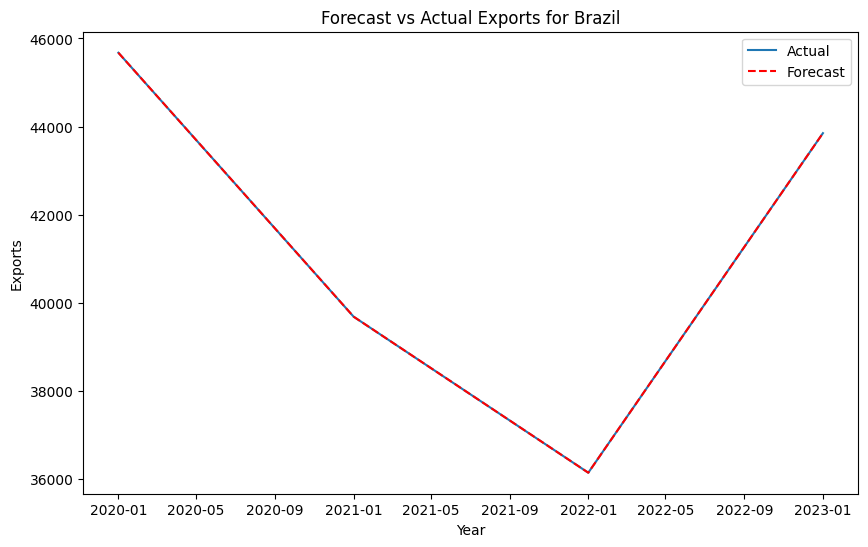

Mean Absolute Error (MAE): 1.8189894035458565e-12
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  3.27106D+10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0   3.271D+10  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

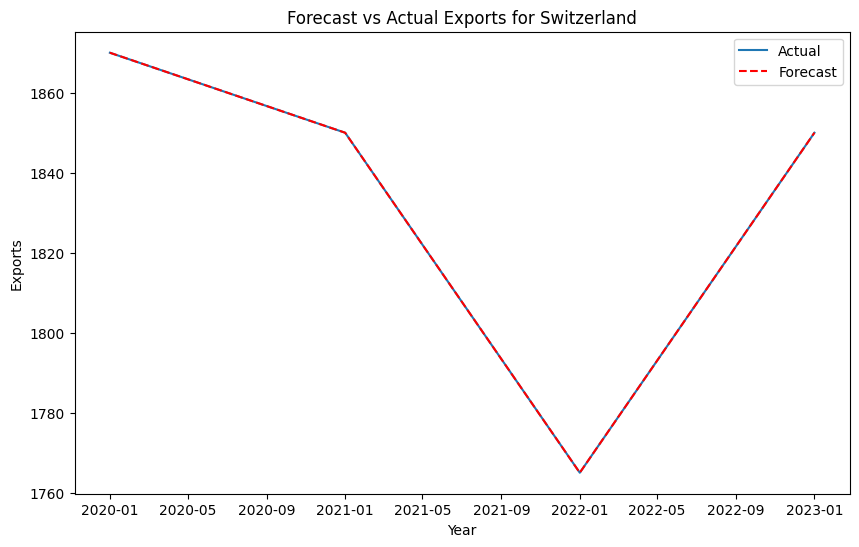

Mean Absolute Error (MAE): 1.1368683772161603e-12
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05246D+01    |proj g|=  2.83191D+09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0   2.832D+09  -1.052D+01
  F =  -10.524604414537132     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rou

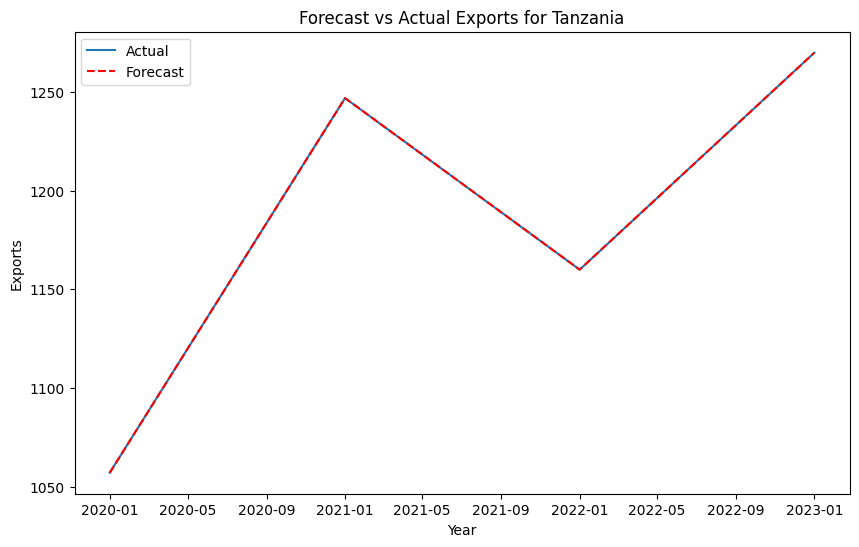

Mean Absolute Error (MAE): 0.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05533D+01    |proj g|=  1.15648D+09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0   1.156D+09  -1.055D+01
  F =  -10.553279232354269     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rou

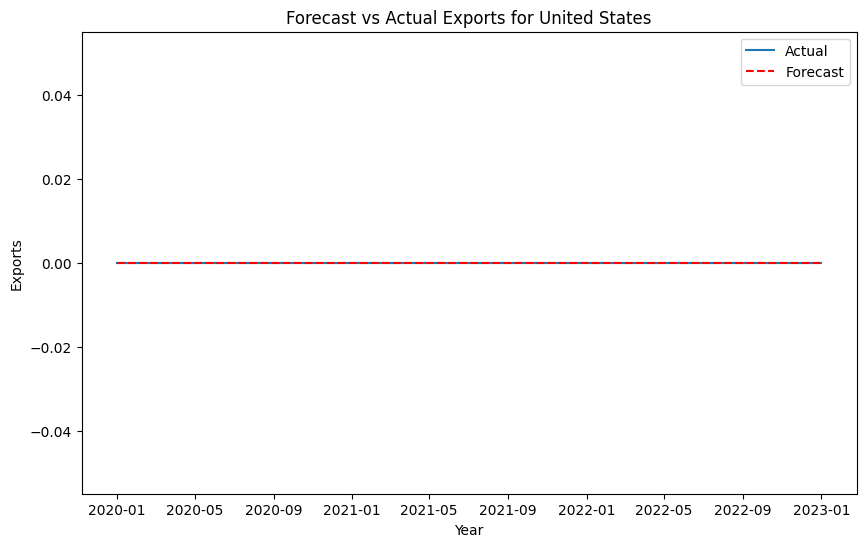

Mean Absolute Error (MAE): 0.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05301D+01    |proj g|=  6.97503D+11

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0   6.975D+11  -1.053D+01
  F =  -10.530100587550002     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rou

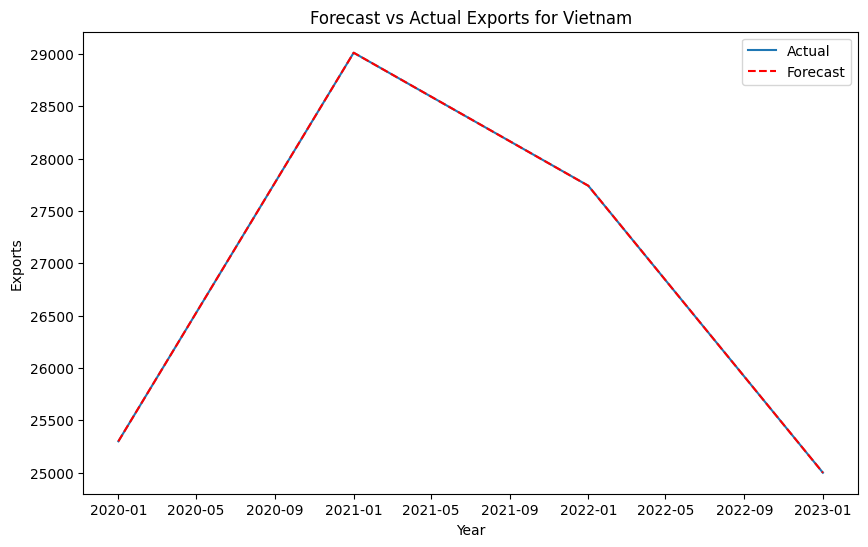

Mean Absolute Error (MAE): 6.366462912410498e-12


In [50]:
# Fit a SARIMAX model using one day lag and bean exports, soluble exports, and roast and ground exports as baseline prediction
for country in countries:
    X_train = df_train[df_train['Country'] == country][['Year', 'Exports', 'Bean Exports', 'Soluble Exports', 'Roast & Ground Exports']]
    X_train['Year'] = pd.to_datetime(X_train['Year'], format='%Y')
    X_train.set_index('Year', inplace=True)
    
    exog_train = X_train[['Bean Exports', 'Soluble Exports', 'Roast & Ground Exports']]
    endog_train = X_train['Exports']
    
    model = SARIMAX(endog=endog_train, exog=exog_train, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))
    model_fit = model.fit()
    
    X_test = df_test[df_test['Country'] == country][['Year', 'Exports', 'Bean Exports', 'Soluble Exports', 'Roast & Ground Exports']]
    X_test['Year'] = pd.to_datetime(X_test['Year'], format='%Y')
    X_test.set_index('Year', inplace=True)
    
    exog_test = X_test[['Bean Exports', 'Soluble Exports', 'Roast & Ground Exports']]
    endog_test = X_test['Exports']
    
    forecast = model_fit.forecast(steps=len(X_test), exog=exog_test)
    
    plt.figure(figsize=(10, 6))
    plt.plot(X_test.index, endog_test, label='Actual')
    plt.plot(X_test.index, forecast, color='red', linestyle='--', label='Forecast')
    plt.xlabel('Year')
    plt.ylabel('Exports')
    plt.title(f'Forecast vs Actual Exports for {country}')
    plt.legend()
    plt.show()
    
    mae = mean_absolute_error(endog_test, forecast)
    print('Mean Absolute Error (MAE):', mae)

Epoch 1/300


/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 31754.2227 - val_loss: 41337.6328
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 31753.0840 - val_loss: 41335.2266
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 31750.6738 - val_loss: 41331.3984
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 31746.8516 - val_loss: 41326.0898
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 31741.5352 - val_loss: 41319.2188
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 31734.6660 - val_loss: 41310.7188
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 31726.1641 - val_loss: 41300.5156
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 31715.9512 - val_loss: 41288.5312
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 31703.9590 - val_loss: 41274.6875
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 31690.1074 - val_loss: 41258.9219
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 31674.3223 - val_loss: 41241.1328


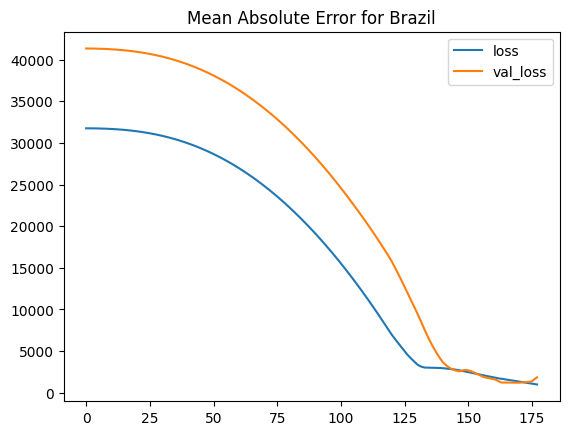

In [153]:
# LSTM forecast
def prepare_lstm_data(data, lag=1):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:(i + lag), :])
        y.append(data[i + lag, :])
    return np.array(X), np.array(y)

for country in countries:
    if country == 'Brazil':
        X_train = df_train[df_train['Country'] == country][['Year', 'Exports', 'Bean Exports', 'Soluble Exports', 'Roast & Ground Exports']]
        X_train['Year'] = pd.to_datetime(X_train['Year'], format='%Y')
        X_train.set_index('Year', inplace=True)
        y_train = X_train['Exports']
        X_train = X_train[['Bean Exports', 'Soluble Exports', 'Roast & Ground Exports']]
        X_test = df_test[df_test['Country'] == country][['Year', 'Exports', 'Bean Exports', 'Soluble Exports', 'Roast & Ground Exports']]
        X_test['Year'] = pd.to_datetime(X_test['Year'], format='%Y')
        X_test.set_index('Year', inplace=True)
        y_test = X_test['Exports']
        X_test = X_test[['Bean Exports', 'Soluble Exports', 'Roast & Ground Exports']]
        scaler = MinMaxScaler(feature_range=(0,1))
        X_train_scaled = scaler.fit_transform(X_train.values)
        y_train = y_train.values.reshape(-1,1)
        # Reshape data for LSTM (samples, time steps, features)
        X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
        # Do the same for test data
        X_test_scaled = scaler.transform(X_test.values)
        X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
        y_test = y_test.values.reshape(-1,1)
        # Define and compile the LSTM model
        model = keras.Sequential()
        model.add(keras.layers.LSTM(units=175, activation='relu', input_shape=(1, X_train_reshaped.shape[2])))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dense(1))
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.07),
                    loss='mae')
        early_stopping = keras.callbacks.EarlyStopping(
            min_delta=0.01,
            patience=8,
            restore_best_weights=True
        )
        history = model.fit(
            X_train_reshaped, y_train,
            validation_data=(X_test_reshaped, y_test),
            batch_size=32,
            epochs=300,
            callbacks=[early_stopping]
        )
        history_df = pd.DataFrame(history.history)
        history_df.loc[:, ['loss', 'val_loss']].plot(title=f"Mean Absolute Error for {country}")
        plt.show()
        break